In [136]:
from datavyz import gedn as ge # my custom dataviz environment
import numpy as np
from neural_network_dynamics import main as ntwk
import time

In [137]:
from model import Model
from iterative_random_search import IterativeSearch, load_results
search = IterativeSearch(Model, run=False, folder='data/batch2bis')
results = load_results('data/batch2bis')

/!\ No grid file provided, running on default (large) grid !!


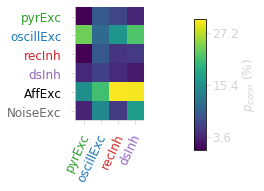

In [139]:
results = load_results('data/batch2bis')
imin = np.argmin(results['residuals'])
Matrix = results['configs'][imin]
translate_SynapseMatrix_into_connectivity_proba(Matrix, Model)
from ntwk_sim import plot_matrix
plot_matrix(Model, ge=ge);

In [ ]:
Model = {
    'REC_POPS':['RecExc', 'RecInh', 'DsInh'],
    'AFF_POPS':['AffExc'],
    ## ---------------------------------------------------------------------------------
    ### Initialisation by default parameters
    ## UNIT SYSTEM is : ms, mV, pF, nS, pA, Hz (arbitrary and unconsistent, so see code)
    ## ---------------------------------------------------------------------------------
    # numbers of neurons in population
    'N_RecExc':4000, 'N_RecInh':1000, 'N_AffExc':100, 'N_DsInh':500,
    # synaptic weights (nS)
    'Q_RecExc_RecExc':2., 'Q_RecExc_RecInh':2., 
    'Q_RecInh_RecExc':10., 'Q_RecInh_RecInh':10., 
    'Q_AffExc_RecExc':4., 'Q_AffExc_RecInh':4., 
    'Q_AffExc_DsInh':4.,
    'Q_DsInh_RecInh':10., 
    # synaptic time constants (ms)
    'Tse':5., 'Tsi':5.,
    # synaptic reversal potentials (mV)
    'Ee':0., 'Ei': -80.,
    # connectivity parameters (proba.)
    'p_RecExc_RecExc':0.05, 'p_RecExc_RecInh':0.05, 
    'p_RecInh_RecExc':0.05, 'p_RecInh_RecInh':0.05, 
    'p_DsInh_RecInh':0.05, 
    'p_AffExc_RecExc':0.1, 'p_AffExc_RecInh':0.1, 
    'p_AffExc_DsInh':0.075,
    # afferent stimulation (Hz)
    'F_AffExc':10.,
    # simulation parameters (ms)
    'dt':0.1, 'SEED':3, # low by default, see later
    ## ---------------------------------------------------------------------------------
    # === cellular properties (based on AdExp), population by population ===
    # --> Excitatory population (RecExc, recurrent excitation)
    'RecExc_Gl':10., 'RecExc_Cm':200.,'RecExc_Trefrac':5.,
    'RecExc_El':-70., 'RecExc_Vthre':-50., 'RecExc_Vreset':-70., 'RecExc_deltaV':0.,
    'RecExc_a':0., 'RecExc_b': 0., 'RecExc_tauw':1e9,
    # --> Inhibitory population (RecInh, recurrent inhibition)
    'RecInh_Gl':10., 'RecInh_Cm':200.,'RecInh_Trefrac':5.,
    'RecInh_El':-70., 'RecInh_Vthre':-53., 'RecInh_Vreset':-70., 'RecInh_deltaV':0.,
    'RecInh_a':0., 'RecInh_b': 0., 'RecInh_tauw':1e9,
    # --> Disinhibitory population (DsInh, disinhibition)
    'DsInh_Gl':10., 'DsInh_Cm':200.,'DsInh_Trefrac':5.,
    'DsInh_El':-70., 'DsInh_Vthre':-50., 'DsInh_Vreset':-70., 'DsInh_deltaV':0.,
    'DsInh_a':0., 'DsInh_b': 0., 'DsInh_tauw':1e9,
    ## ---------------------------------------------------------------------------------
    # === afferent population waveform:
    'Faff1':4.,'Faff2':20.,'Faff3':8.,
    'DT':900., 'rise':50.
}


In [5]:
from datavyz import ges
import numpy as np

In [34]:
from iterative_random_search import translate_SynapseMatrix_into_connectivity_proba
Matrix = np.array([[31.39922989, 11.25626967,228.64373152,437.90838386],
                   [ 23.3823023,  24.00381028,  2.60924659, 24.92926268],
                   [  5.5406887,  72.31946053, 25.81555052, 85.21074598],
                   [ 35.53219491, 19.53972558,  9.42041235, 17.74870803],
                   [ 14.36216749, 19.00609074, 17.46361462, 31.54156091],
                   [  5.57448206, 25.44980921, 17.381281,   25.01821564]])
translate_SynapseMatrix_into_connectivity_proba(Matrix, Model, verbose=True)

Model['p_pyrExc_pyrExc'] = 0.008
Model['p_pyrExc_oscillExc'] = 0.003
Model['p_pyrExc_recInh'] = 0.057
Model['p_pyrExc_dsInh'] = 0.109
Model['p_oscillExc_pyrExc'] = 0.234
Model['p_oscillExc_oscillExc'] = 0.240
Model['p_oscillExc_recInh'] = 0.026
Model['p_oscillExc_dsInh'] = 0.249
Model['p_recInh_pyrExc'] = 0.006
Model['p_recInh_oscillExc'] = 0.072
Model['p_recInh_recInh'] = 0.026
Model['p_recInh_dsInh'] = 0.085
Model['p_dsInh_pyrExc'] = 0.071
Model['p_dsInh_oscillExc'] = 0.039
Model['p_dsInh_recInh'] = 0.019
Model['p_dsInh_dsInh'] = 0.035
Model['p_AffExc_pyrExc'] = 0.144
Model['p_AffExc_oscillExc'] = 0.190
Model['p_AffExc_recInh'] = 0.175
Model['p_AffExc_dsInh'] = 0.315
Model['p_NoiseExc_pyrExc'] = 0.028
Model['p_NoiseExc_oscillExc'] = 0.127
Model['p_NoiseExc_recInh'] = 0.087
Model['p_NoiseExc_dsInh'] = 0.125


In [133]:
mf = ntwk.FastMeanField(Model, tstop=10., dt=2.5e-3, tau=20e-3)
mf.build_TF_func(tf_sim_file='neural_network_dynamics/theory/tf_sim_points.npz')

Adding Increasing Step Waveform to: AffExc
Setting Constant Level to: NoiseExc
Adding intrinsic oscillation to: oscillExc
Building interpolation [...]


In [134]:
Matrix = mf.from_Model_pconn_to_Effective_Connectivity_Matrix(Model)
for i, ii in enumerate(list(Model['REC_POPS'])+list(Model['AFF_POPS'])):
    for j, jj in enumerate(Model['REC_POPS']):
        Model['p_%s_%s' % (ii,jj)] = 0.
        
Matrix = mf.from_Model_pconn_to_Effective_Connectivity_Matrix(Model)

running ODE integration [...]
--- ODE integration took 352.5 milliseconds 


(<Figure size 119.055x102.047 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99a4ac2f90>)

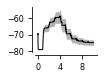

In [135]:
Model['p_AffExc_pyrExc'] = 0.15
Model['p_AffExc_recInh'] = 0.15
Model['p_recInh_pyrExc'] = 0.05
Model['p_pyrExc_pyrExc'] = 0.01
Model['p_pyrExc_pyrExc'] = 0.01
Model['p_AffExc_dsInh'] = 0.
Model['p_dsInh_recInh'] = 0.

Matrix = mf.from_Model_pconn_to_Effective_Connectivity_Matrix(Model)
X, mVm, sVm = mf.run_single_connectivity_sim(Matrix, verbose=True)
ge.plot(mf.t, 1e3*mVm[0,:], sy=1e3*sVm[0,:])

(<Figure size 294.803x260.787 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99a6d85790>)

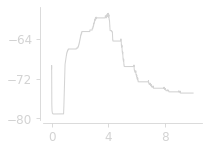

In [125]:
ge.plot(mf.t, 1e3*mVm[0,:], sy=1e3*sVm[3,:])

In [127]:
from ntwk_sim import *
run_sim(Model, filename='data/test/test.h5', verbose=False)
run_slow_mf('data/test/test.ntwk.h5')

--initializing simulation for data/test/test.h5 [...]
Nsyn = 0 for AffExc_oscillExc
Nsyn = 0 for AffExc_dsInh
Nsyn = 0 for NoiseExc_pyrExc
Nsyn = 0 for NoiseExc_oscillExc
Nsyn = 0 for NoiseExc_recInh
Nsyn = 0 for NoiseExc_dsInh
----   running simulation for data/test/test.h5 [...]
[ok] Results of the simulation are stored as: data/test/test.h5
--   running (slow) mean-field for data/test/test.h5 [...]
running ODE integration [...]
--- ODE integration took 21.6 seconds ---


Adding Increasing Step Waveform to: AffExc
Setting Constant Level to: NoiseExc
Adding intrinsic oscillation to: oscillExc
Building interpolation [...]
running ODE integration [...]
--- ODE integration took 193.5 milliseconds 


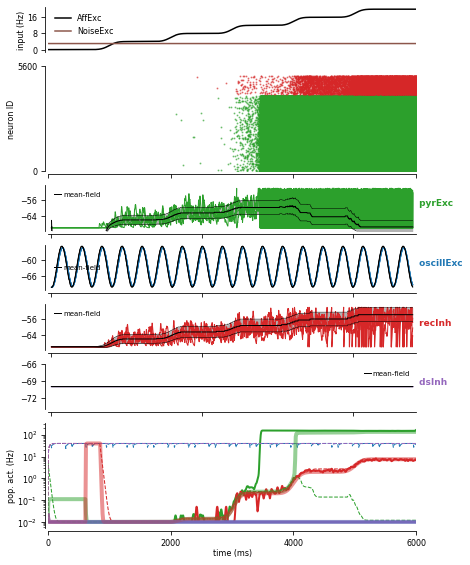

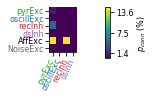

In [132]:
plot_sim('data/test/test.ntwk.h5', ge)

In [108]:
Matrix

array([[40.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [50.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  0.],
       [15.,  0., 15.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [ ]:
for i, ii in enumerate(self.REC_POPS+self.AFF_POPS):
    for j, jj in enumerate(self.REC_POPS):
        ecMatrix[i,j] = Model['p_%s_%s' % (ii,jj)]*Model['N_%s' % ii]


In [ ]:

run_sim(Model, filename=fn, verbose=False)

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7fcd86c20590>)

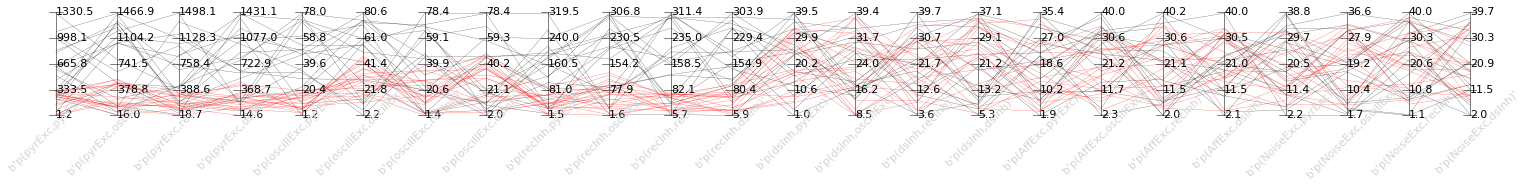

In [15]:

fig, ax = ge.figure(figsize=(3.,1), bottom=2.)

labels = np.chararray(search.result['configs'][0].shape, itemsize=20)

for i, spop in enumerate(Model['REC_POPS']+Model['AFF_POPS']):
    for j, tpop in enumerate(Model['REC_POPS']):
        labels[i, j] = str("p(%s,%s)" % (spop, tpop))
    

N = 20
Y = [search.sort_random_configs(n=N)[i].flatten() for i in range(N)]+\
    [search.get_x_best_configs(N)[i].flatten() for i in range(N)]
COLORS = ['k' for i in range(N)]+['r' for i in range(N)]
ge.parallel_plot(Y=Y, COLORS=COLORS,
                 ax=ax, color='r', SET_OF_LABELS=labels.flatten(), lw=0.2,
                 label_annotation_args=dict(ha='center', va='center',size='small',rotation=45))



In [46]:
from iterative_random_search import GRID0

def compute_new_grid(self,
                     Nbest_criteria=100,
                     variance_factor=2.):
    
    GRID1 = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS),2))

    CONFIGS = np.array(search.get_x_best_configs(Nbest_criteria))
    for i, spop in enumerate(REC_POPS+AFF_POPS):
        for j, tpop in enumerate(REC_POPS):
            mean, std = CONFIGS[:,i,j].mean(), CONFIGS[:,i,j].std()
            print(spop, tpop, mean, std)
            GRID1[i,j,:] = [np.max([1,mean-variance_factor*std]),
                            np.min([GRID0[i,j,1],mean+variance_factor*std])]
            
    return GRID1
GRID1 = compute_new_grid(search, 100, 1.5)
print(GRID1)

pyrExc pyrExc 67.2312406919457 167.0781689604548
pyrExc oscillExc 111.40080252833346 285.59157019601804
pyrExc recInh 75.44073722122255 219.23177574664666
pyrExc dsInh 100.51636826002614 270.5312900354642
oscillExc pyrExc 20.36309327953778 12.132900461084906
oscillExc oscillExc 26.157869185376498 14.869347088508459
oscillExc recInh 20.488680917763727 13.397457292795638
oscillExc dsInh 23.283814354716686 16.655384452841943
recInh pyrExc 33.878311159717434 42.90275417785376
recInh oscillExc 42.12849637237676 59.802669823727456
recInh recInh 25.309393501004706 33.563281382959744
recInh dsInh 28.591795000743627 47.6642975826874
dsInh pyrExc 20.991783284814183 10.323761219611557
dsInh oscillExc 23.655758035655964 10.562345938022085
dsInh recInh 19.324781953251158 10.422584899583022
dsInh dsInh 20.34769545470735 10.450021619940633
AffExc pyrExc 19.684389821549193 12.39046502317864
AffExc oscillExc 20.388397654434574 11.123385713540587
AffExc recInh 21.192149843025533 11.189453782771832
AffEx

In [32]:
GRID1

array([[[  1.        , 571.85694048],
        [  1.        , 740.23741987],
        [  1.        , 581.64000816],
        [  1.        , 715.98472132]],

       [[  1.        ,  46.19787041],
        [  1.        ,  58.87855325],
        [  1.        ,  49.83244924],
        [  1.        ,  55.14003086]],

       [[  1.        , 158.83615425],
        [  1.        , 177.31709467],
        [  1.        ,  84.33401029],
        [  1.        , 141.97207081]],

       [[  1.        ,  40.        ],
        [  1.46174454,  40.        ],
        [  1.        ,  40.        ],
        [  1.        ,  40.        ]],

       [[  1.        ,  40.        ],
        [  1.        ,  40.        ],
        [  1.        ,  40.        ],
        [  1.        ,  39.89726396]],

       [[  1.        ,  40.        ],
        [  1.        ,  40.        ],
        [  1.        ,  40.        ],
        [  1.        ,  40.        ]]])

In [27]:
np.mean(GRID1, axis=-1).flatten()

array([286.42847024, 370.61870993, 291.32000408, 358.49236066,
        23.59893521,  29.93927663,  25.41622462,  28.07001543,
        79.91807713,  89.15854734,  42.66700515,  71.4860354 ,
        20.5       ,  20.73087227,  20.5       ,  20.5       ,
        20.5       ,  20.5       ,  20.5       ,  20.44863198,
        20.5       ,  20.5       ,  20.5       ,  20.5       ])

In [24]:
N = 50
Y = [search.sort_random_configs(n=N)[i].flatten() for i in range(N)]+\
    [search.get_x_best_configs(N)[i].flatten() for i in range(N)]+\
    [np.mean(GRID1, axis=-1).flatten()]

COLORS = ['k' for i in range(N)]+['r' for i in range(N)]+[ge.b]
ges.parallel_plot(Y=Y, COLORS=COLORS,
                  ax=ax, SET_OF_LABELS=labels.flatten(), lw=0.2,
                  label_annotation_args=dict(ha='center', va='center',size='small',rotation=45))

NameError: name 'ge' is not defined

In [7]:
from model import *
pconnMatrix = 0*Matrix
for i, poop in enumerate(REC_POPS+AFF_POPS):
    N = Model['N_%s' % pop]
    pconnMatrix[i,:] = Matrix[i,:]/N
pconnMatrix    

array([[0.02287013, 0.02101956, 0.03331021, 0.01544278],
       [0.01188646, 0.01670809, 0.01671686, 0.02243697],
       [0.00385558, 0.05483322, 0.05140166, 0.06471772],
       [0.0053527 , 0.05481065, 0.06950568, 0.0040579 ],
       [0.02683395, 0.01094194, 0.01627584, 0.02951907],
       [0.00363265, 0.05394331, 0.0760126 , 0.06583495]])

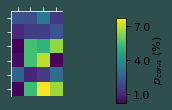

In [50]:
fig, ax, acb = ge.figure(figsize=(1.,1.), with_bar_legend=True, bottom=0.1)
Lims = [np.round(100*pconnMatrix.min(),1)-.1,np.round(100*pconnMatrix.max(),1)+.1]
ge.matrix(100*pconnMatrix.T, origin='upper', ax=ax, vmin=Lims[0], vmax=Lims[1])
ge.build_bar_legend_continuous(acb, ge.viridis, bounds=[Lims[0], Lims[1]],
                               label='$p_{conn}$ (%)')
ge.set_plot(ax,
            ['left', 'top'],
            tck_outward=0,
            xticks=.75*np.arange(0,4)+.75/2.,
            xticks_labels=[],
            xlim_enhancment=0, ylim_enhancment=0,
            yticks=.83*np.arange(0,6)+.85/2.,
            yticks_labels=[])
fig.savefig('fig.png')

TypeError: figure() got an unexpected keyword argument 'with_space_for_bar_legend'

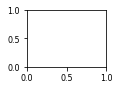

TypeError: figure() got an unexpected keyword argument 'with_space_for_bar_legend'

In [33]:


def connectivity_matrix_plot(Matrix, REC_POPS, AFF_POPS,
                             ax=None, graph=ge):
    if ax is None:
        fig, ax = graph.figure(left=.7, bottom=.7)
    else:
        fig = None

    ge.matrix(Matrix)

connectivity_matrix_plot(MinexcMatrix, REC_POPS, AFF_POPS)

(<Figure size 1542.05x260.787 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f782f3e2e10>)

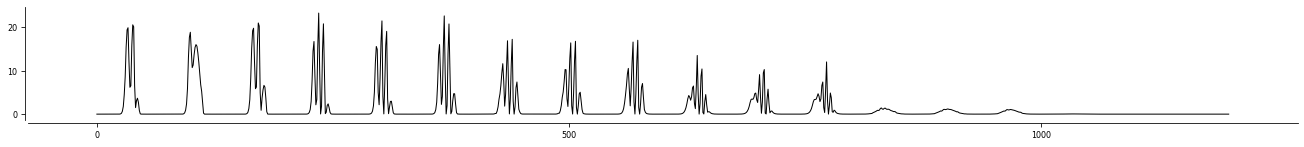

In [28]:

MinexcMatrix = search.result['configs'][np.argmin(search.result['residuals'])]
X = searchR.mf.run_single_connectivity_sim(MinexcMatrix, verbose=False)
ge.plot(X[1,:], fig_args={'figsize':(4,2)})

(<Figure size 147.402x130.394 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7831803d50>)

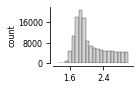

In [6]:
ge.hist(np.log10(search.result['residuals']))

In [7]:
search.mf.mean_Vm_func([0., 0., 200])

array([-0.05])

In [22]:
Cexc, Cinh = search.mf.compute_exc_inh_matrices(search.mf.ecMatrix)
X = search.mf.run_single_connectivity_sim(search.mf.ecMatrix, verbose=False)
print(np.dot(np.concatenate([X[:,0], search.mf.FAFF[:,int(0/search.mf.dt)]]), Cexc))

AttributeError: 'InterativeSearch' object has no attribute 'mf'

AttributeError: 'InterativeSearch' object has no attribute 'mf'

AttributeError: 'InterativeSearch' object has no attribute 'mf'

In [22]:
it, tt=1, 1
ipop = 3
search.mf.mean_Vm_func(np.array([np.dot(np.concatenate([X[:,it], search.mf.FAFF[:,int(tt/search.mf.dt)]]), Cexc)[ipop],
                                 np.dot(np.concatenate([X[:,it], search.mf.FAFF[:,int(tt/search.mf.dt)]]), Cinh)[ipop],
                                 search.mf.I_INTRINSINC[ipop,int(tt/search.mf.dt)]])[0])


array([-0.0671014])

In [37]:
CONFIGS = search.sort_random_configs()
X = search.mf.run_single_connectivity_sim(CONFIGS[4], verbose=False)
Vm = search.mf.convert_to_mean_Vm_trace(X, 'pyrExc')

WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2514: RuntimeWarning: overflow encountered in multiply
  weight *= np.where(ei == i, 1 - yi, yi)
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2514: RuntimeWarning: invalid value encountered in multiply
  weight *= np.where(ei == i, 1 - yi, yi)
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2515: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2539: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2540: RuntimeWarning: invalid value encountered in greater
  out_of

In [54]:
CONFIGS[0] = search.mf.ecMatrix
X = search.mf.run_single_connectivity_sim(CONFIGS[4], verbose=False)
Vm = search.mf.convert_to_mean_Vm_trace(X, 'pyrExc')
cond = (Vm>-100e-3) & (Vm<=-30e-3)
residual = np.sqrt(np.sum((1e3*Vm-Model['pyrExc_El']-search.desired_Vm)**2))
np.isfinite(residual)

WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
 [py.warnings]


False

In [59]:
res = search.run_single_sim(CONFIGS[4])

WARNING    /home/yann/work/spkNtwk-cortStatesWakefulness/iterative_random_search.py:89: RuntimeWarning: invalid value encountered in greater
  residual = np.sqrt(np.sum((1e3*Vm-self.Model['pyrExc_El']-self.desired_Vm)**2))
 [py.warnings]
WARNING    /home/yann/work/spkNtwk-cortStatesWakefulness/iterative_random_search.py:89: RuntimeWarning: invalid value encountered in less_equal
  residual = np.sqrt(np.sum((1e3*Vm-self.Model['pyrExc_El']-self.desired_Vm)**2))
 [py.warnings]


613 1200


[-69.72111618 -69.72111618 -69.72111618 ...          nan          nan
          nan]


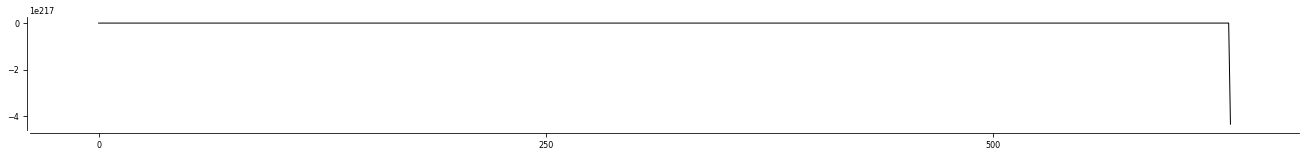

In [39]:
ge.plot(1e3*Vm, fig_args={'figsize':(4,2)})
print(1e3*Vm)

In [19]:
from model import Model
from iterative_random_search import InterativeSearch
searchR = InterativeSearch(Model, run=True)


Adding Increasing Step Waveform to: AffExc
Setting Constant Level to: NoiseExc
Adding intrinsic oscillation to: oscillExc
Initializing simulation [...]
Performing grid simulation [...]
Building interpolation [...]
--> Done !


In [ ]:

searchR.mf.run_single_connectivity_sim(search.mf.ecMatrix, verbose=False)

In [3]:
from model import Model, REC_POPS, AFF_POPS
import neural_network_dynamics.main as ntwk
from Umodel import Umodel

mf = ntwk.FastMeanField(Model, REC_POPS, AFF_POPS, tstop=6.)

mf.build_TF_func(100, with_Vm_functions=True, sampling='log')


Adding Increasing Step Waveform to: AffExc
Setting Constant Level to: NoiseExc
Adding intrinsic oscillation to: oscillExc
Initializing simulation [...]
Performing grid simulation [...]
Building interpolation [...]
--> Done !
running ODE integration [...]
--- ODE integration took 236.9 milliseconds 


In [29]:
Vm0 = search.desired_Vm
1e-3*Vm0-70e-3

array([-0.06986524, -0.06983196, -0.0697324 , ..., -0.04999962,
       -0.04999983, -0.04999996])

WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
 [py.warnings]
WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2515: RuntimeWarning: overflow encountered in multiply
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
 [py.warnings]


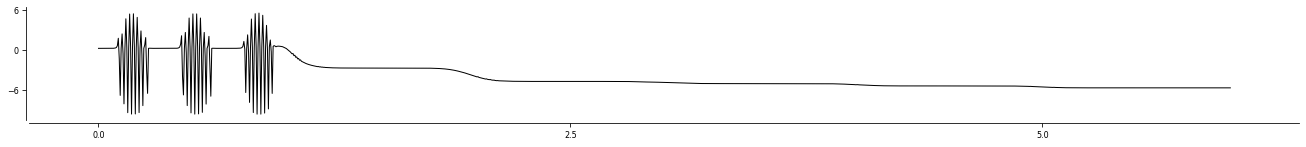

In [51]:
for i in range(1000):
    res = compute_Vm_residual(search, mf.run_single_connectivity_sim(CONFIGS[i,:,:], verbose=False))
    if res<100:
        X = mf.run_single_connectivity_sim(CONFIGS[i,:,:], verbose=False)
        Vm = mf.convert_to_mean_Vm_trace(X, 'pyrExc')
        ge.plot(mf.t, 1e3*Vm+70, fig_args={'figsize':(4,2)})
        

1200 1200


(<Figure size 147.402x130.394 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ea53a2f50>)

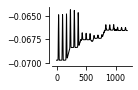

In [30]:
cond = (Vm>-80e-3) & (Vm<-50e-3)
print(len(cond), np.sum(cond))
clean_Vm = Vm[cond]
ge.plot(clean_Vm)

(<Figure size 147.402x130.394 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ea5577b10>)

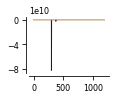

In [15]:
ge.plot(Y=[1e3*Vm-Model['pyrExc_El'],search.desired_Vm])

In [37]:
def compute_Vm_residual(self, X):
    Vm = self.mf.convert_to_mean_Vm_trace(X, 'pyrExc')
    cond = (Vm>-80e-3) & (Vm<=-45e-3)
    if np.sum(cond)<len(cond):
        return 1000
    else:
        residual = np.sqrt(np.sum((1e3*Vm-Model['pyrExc_El']-search.desired_Vm)**2))
        return residual/mf.t[-1]

compute_Vm_residual(search, X)

42.80145220313377

In [13]:
X = mf.run_single_connectivity_sim(CONFIGS[0,:,:], verbose=True)
Vm = mf.convert_to_mean_Vm_trace(X, 'pyrExc')
print(np.sum(np.sqrt((1e3*Vm-Model['pyrExc_El']-search.desired_Vm)**2)))

running ODE integration [...]
--- ODE integration took 267.9 milliseconds 
84446924323.403


In [50]:
CONFIGS = search.sort_random_configs(seed=1, n=1000)

In [6]:
CONFIGS[0,:,:]

array([[41.70220047, 41.91945144, 80.07445687,  9.83468338],
       [98.88610889,  1.93669579, 10.23344288, 90.34019153],
       [88.33060912, 11.4745973 , 32.66449018, 17.23405083],
       [ 1.98801338, 58.57592715, 55.6240234 ,  7.19742797],
       [23.98477591, 31.73624093, 62.9717507 , 26.32967705],
       [95.01761192, 39.48756129, 17.61962556, 45.98802658]])

1200 1200


NameError: name 'search' is not defined

In [5]:
from model import Model
from iterative_random_search import InterativeSearch
search = InterativeSearch(Model, run=True)


Adding Increasing Step Waveform to: AffExc
Setting Constant Level to: NoiseExc
Adding intrinsic oscillation to: oscillExc
Initializing simulation [...]
Performing grid simulation [...]
Building interpolation [...]
--> Done !


In [13]:
from neural_network_dynamics import main as ntwk
#import ntwk.stim_waveforms as stim_waveforms

In [50]:
from scipy.interpolate import RegularGridInterpolator
import itertools

from neural_network_dynamics import main as ntwk

class FastMeanField:

    def __init__(self, Model, REC_POPS, AFF_POPS,
                 tstop=None, dt=None):

        self.REC_POPS = REC_POPS
        self.AFF_POPS = AFF_POPS
        self.Model = Model
        
        # initialize time axis
        if dt is None:
            self.dt = Model['dt']
        else:
            self.dt = dt
        if tstop is None:
            self.tstop = Model['tstop']
        else:
            self.tstop = tstop
        self.t = np.arange(int(self.tstop/self.dt))*self.dt
        
        # initialize connectivity matrix
        self.initialize_Effective_Connectivity_Matrix(Model)
        self.compute_exc_inh_matrix_factors(Model)
        
        # initialize afferent input
        self.FAFF = np.zeros((len(self.t),len(self.AFF_POPS)))
        for ipop, pop in enumerate(AFF_POPS):
            if '%s_IncreasingStep_size'%pop in Model:
                print('Adding Increasing Step Waveform to:', pop)
                self.FAFF[:,ipop] = ntwk.stim_waveforms.IncreasingSteps(self.t, pop, Model, translate_to_SI=True)
            else:
                print('Setting Constant Level to:', pop)
                self.FAFF[:,ipop] = 0*self.t+Model['F_%s'%pop]

        # intrinsic currents
        self.I_INTRINSINC = np.zeros((len(self.t),len(self.REC_POPS)))
        for ipop, pop in enumerate(REC_POPS):
            # only support for time-phase-locked oscillatory current so far
            if '%s_Ioscill_freq'%pop in Model:
                print('Adding intrinsic oscillation to:', pop)
                self.I_INTRINSINC[:,ipop] = ntwk.stim_waveforms.Intrinsic_Oscill(self.t, pop, Model, translate_to_SI=True)

        # matrix
        self.compute_exc_inh_matrix_factors(Model)

        self.TF_func = None # to be initialized !
        
    # initialize Effective Connectivity
    def initialize_Effective_Connectivity_Matrix(self, Model):
        self.ecMatrix = np.zeros((len(self.REC_POPS)+len(self.AFF_POPS), len(self.REC_POPS)))
        for i, ii in enumerate(self.REC_POPS+self.AFF_POPS):
            for j, jj in enumerate(self.REC_POPS):
                self.ecMatrix[i,j] = Model['p_%s_%s' % (ii,jj)]*Model['N_%s' % ii]


    def compute_exc_inh_matrix_factors(self, Model):
        self.CexcF = np.zeros((len(self.REC_POPS)+len(self.AFF_POPS), len(self.REC_POPS)))
        self.CinhF = np.zeros((len(self.REC_POPS)+len(self.AFF_POPS), len(self.REC_POPS)))
        for i, ii in enumerate(self.REC_POPS+self.AFF_POPS):
            for j, jj in enumerate(self.REC_POPS):
                if len(ii.split('Exc'))>1:
                    self.CexcF[i,j] = 1.
                elif len(ii.split('Inh'))>1:
                    self.CinhF[i,j] = 1.
                else:
                    raise NameError('/!\ %s is not classified as Exc or Inh' % ii+jj)

                
    def compute_exc_inh_matrices(self, ecMatrix):
        # just separates excitation and inhibition
        return np.multiply(ecMatrix, sim.CexcF), np.multiply(ecMatrix, sim.CinhF)

    
    def build_TF_func(self, Ngrid=20, coeffs_location='data/COEFFS_pyrExc.npy', pop=None):
        """
        """

        print('Initializing simulation [...]')
        if pop is None:
            pop = self.REC_POPS[0]
            
        # taking just one Exc and One Inh pop for the scan !!
        Exc_pop = [rec for rec in REC_POPS if len(rec.split('Exc'))>1][0]
        Inh_pop = [rec for rec in REC_POPS if len(rec.split('Inh'))>1][0]
        
        # building artificial simulation situation (with just one exc and one inh)
        AFF_POPS = [Exc_pop, Inh_pop]
        Model2 = self.Model.copy()
        Model2['N_%s'%Exc_pop], Model2['N_%s'%Inh_pop] = 10, 10
        Model2['p_%s_%s'%(Exc_pop, pop)], Model2['p_%s_%s'%(Inh_pop, pop)] = 0.1, 0.1
        
        nrn_params = ntwk.built_up_neuron_params(Model2, pop)
        syn_input = ntwk.build_up_afferent_synaptic_input(Model2,
                                                          AFF_POPS, pop)
        Model2['COEFFS'] = np.load(coeffs_location)
        Freq_Exc = np.logspace(-2, 3, Ngrid+1)
        Freq_Inh = np.logspace(-2, 3, Ngrid)
        Ioscill = np.linspace(0, 20*10, int(Ngrid/2))
        output_freq = np.zeros((len(Freq_Exc), len(Freq_Inh), len(Ioscill)))

        print('Performing grid simulation [...]')
        for i, j, k in itertools.product(range(len(Freq_Exc)), range(len(Freq_Inh)),
                                         range(len(Ioscill))):
            if Freq_Exc[i]<10:
                output_freq[i,j,k] = 0
            else:
                output_freq[i,j,k] = ntwk.mean_field.input_output(nrn_params, syn_input,
                                        {'F_%s'%Exc_pop:Freq_Exc[i], 'F_%s'%Inh_pop:Freq_Inh[j]},
                                        Model2['COEFFS'],
                                        current_input=Ioscill[k])
        print('Building interpolation [...]')
        self.TF_func = RegularGridInterpolator([Freq_Exc*\
                                                Model2['p_%s_%s'%(Exc_pop, pop)]*Model2['N_%s'%Exc_pop],
                                                Freq_Inh*\
                                                Model2['p_%s_%s'%(Inh_pop, pop)]*Model2['N_%s'%Inh_pop],
                                                Ioscill],
                                               output_freq,
                                               method='linear',
                                               fill_value=None, bounds_error=False)
        print('--> Done !')

    def rise_factor(self, X, t, Cexc, Cinh):
        return self.TF_func(np.array([np.dot(np.concatenate([X, self.FAFF[int(t/self.dt),:]]), Cexc),
                              np.dot(np.concatenate([X, self.FAFF[int(t/self.dt),:]]), Cinh),
                              self.I_INTRINSINC[int(t/self.dt),:]]).T)

    
    def dX_dt(self, X, t, Cexc, Cinh, tau=5e-3):
        return (self.rise_factor(X,t,Cexc,Cinh)-X)/tau

        
    def run_single_connectivity_sim(self, ecMatrix):
        
        X = np.zeros((len(self.t), len(self.REC_POPS)))
        
        if self.TF_func is None:
            raise NameError('/!\ Need to run the "build_TF_func" protocol before')
        else:
            Cexc, Cinh = self.compute_exc_inh_matrices(ecMatrix)
            # simple forward Euler iteration
            for it, tt in enumerate(self.t[:-1]):
                X[it+1,:] = X[it,:]+self.dt*self.dX_dt(X[it,:], tt, Cexc, Cinh)
                
        return X



In [53]:
sim.build_TF_func(40)

Initializing simulation [...]
Performing grid simulation [...]
Building interpolation [...]
--> Done !


In [54]:
X = sim.run_single_connectivity_sim(sim.ecMatrix)

(<Figure size 1542.05x391.181 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5330320a10>)

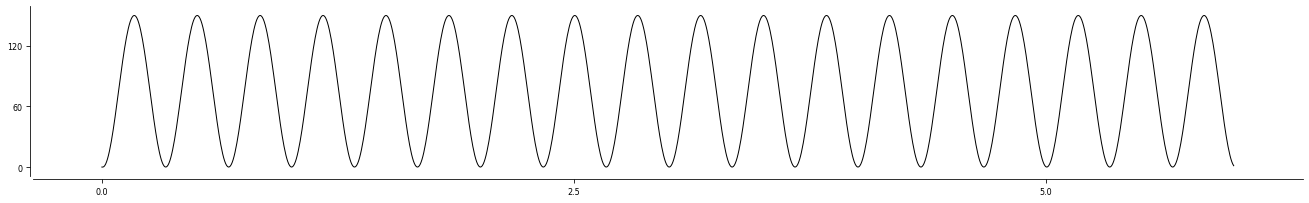

In [55]:
ge.plot(sim.t, sim.I_INTRINSINC[:,1], fig_args=dict(figsize=(4,3)))

(<Figure size 1542.05x391.181 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53302c5790>)

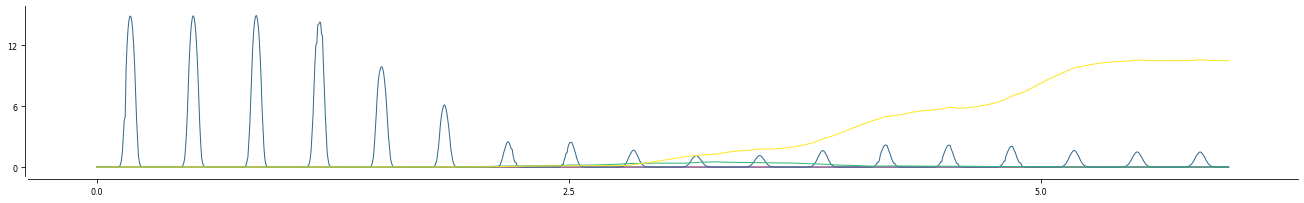

In [56]:
ge.plot(sim.t, Y=X.T, fig_args=dict(figsize=(4,3)))

In [36]:
from model import Model, REC_POPS, AFF_POPS


In [51]:
sim = FastMeanField(Model, REC_POPS, AFF_POPS, tstop=6, dt=5e-3)

Adding Increasing Step Waveform to: AffExc
Setting Constant Level to: NoiseExc
Adding intrinsic oscillation to: oscillExc


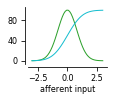

In [5]:
from analyz.signal_library.classical_functions import gaussian, gaussian_cumproba
x = np.linspace(-3,3)
fig, ax = ge.figure(with_legend_space=True)
ge.plot(x, 100.*gaussian(x, std=0.8)/np.max(gaussian(x, std=0.8)), ax=ax, no_set=True, color=ge.g)
ge.plot(x, 100.*gaussian_cumproba(x), ax=ax, no_set=True, color=ge.cyan)
ge.set_plot(ax, xlabel='afferent input', ylabel='')

# Transfer function determnination

In [3]:
data = np.load('data/tf_data.npy', allow_pickle=True).item()

In [182]:

from model import *

# generate the function
data = np.load('data/tf_data.npy', allow_pickle=True).item()
data['Model']['COEFFS'] = np.load('data/COEFFS_pyrExc.npy')

# scanning grid !
N = 50
Ioscill = np.linspace(0, 20*10, N-1)
Freq_Exc = np.logspace(np.log10(0.1), np.log10(1000), N+1)*\
    data['Model']['N_pyrExc']*data['Model']['p_pyrExc_pyrExc']
Freq_Inh = np.logspace(np.log10(0.1), np.log10(1000), N)*\
    data['Model']['N_recInh']*data['Model']['p_recInh_pyrExc']


# ten we put evrything to 1 to absorb all constants
data['Model']['N_pyrExc'], data['Model']['p_pyrExc_pyrExc'] = 1, 1
data['Model']['N_recInh'], data['Model']['p_recInh_pyrExc'] = 1, 1
nrn_params = ntwk.built_up_neuron_params(data['Model'], 'pyrExc')
syn_input = ntwk.build_up_afferent_synaptic_input(data['Model'],
                                                  ['pyrExc', 'recInh'], 'pyrExc')

import itertools

points, output_freq = [], []
output_freq = np.zeros((len(Freq_Exc), len(Freq_Inh), len(Ioscill)))
for i, j, k in itertools.product(range(len(Freq_Exc)), range(len(Freq_Inh)), range(len(Ioscill))):
    points.append([Freq_Exc[i], Freq_Inh[j], Ioscill[k]])
    output_freq[i,j,k] = ntwk.mean_field.input_output(nrn_params, syn_input,
                                                    {'F_pyrExc':Freq_Exc[i], 'F_recInh':Freq_Inh[j]},
                                                    data['Model']['COEFFS'],
                                                    current_input=Ioscill[k])
points = np.array(points)

output_freq = np.array(output_freq)

# firing_lower_threshold = 1e-2
#output_freq[output_freq<firing_lower_threshold] = firing_lower_threshold

In [183]:
from scipy.interpolate import RegularGridInterpolator
func = RegularGridInterpolator([Freq_Exc, Freq_Inh, Ioscill],
                               output_freq,
                               method='linear',
                               fill_value=None, bounds_error=False)

In [254]:
nrn_params = ntwk.built_up_neuron_params(Model, 'oscillExc')
syn_input = ntwk.build_up_afferent_synaptic_input(Model,
                                                  ['oscillExc', 'recInh', 'AffExc'], 'oscillExc')
Model['COEFFS'] = np.load('data/COEFFS_pyrExc.npy')
print(ntwk.mean_field.input_output(nrn_params, syn_input,
                                   {'F_oscillExc': 0.1, 'F_recInh': 0.1, 'F_AffExc': 2.0},
                                   Model['COEFFS'],
                                   current_input=0))
print(func([20., 0., 0.]))

2.6005583810190283
[6.80471688e-18]


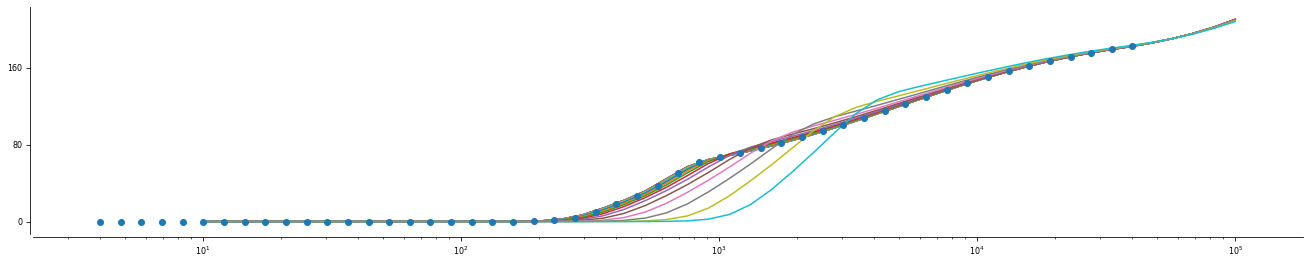

In [84]:
fig, ax = ge.figure(figsize=(4,4))
freq = np.logspace(1, 5)
for i, fi in enumerate(np.logspace(np.log10(0.1), np.log10(500), 20)):
    ax.plot(freq, func([[f, fi, 0] for f in freq]))

ax.plot(Freq_Exc, output_freq[:,0,0], 'o')
#ge.set_plot(ax, xscale='log', yscale='log')
ge.set_plot(ax, xscale='log')

In [7]:
%time x=[func([i, 200, 0.1]) for i in range(200)]        

CPU times: user 69.7 ms, sys: 8.62 ms, total: 78.3 ms
Wall time: 62.2 ms


In [34]:
# designing the 

#tstop, dt = 1e-3*data['tstop'], 1e-2
#t = np.arange(int(tstop/dt))*dt


# F array in to order of REC_POPS
F = np.ones(len(REC_POPS))
A = np.ones(len(AFF_POPS))

Connectivity_Matrix = None
# Connectivity matrix of size (a+f, f)
C = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# connectivity matrix of excitatory interactions
Cexc = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# connectivity matrix of excitatory interactions
Cinh = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# building the connectivities for the ODE solver
for i, ii in enumerate(REC_POPS+AFF_POPS):
    for j, jj in enumerate(REC_POPS):
        if Connectivity_Matrix is None:
            C[i,j] = Model['p_%s_%s' % (ii,jj)]*Model['N_%s' % ii]
        else:
            C[i,j] = Connectivity_Matrix[i,j]
        if len(ii.split('Exc'))>1:
            Cexc[i,j] = C[i,j]
        elif len(ii.split('Inh'))>1:
            Cinh[i,j] = C[i,j]
        else:
            print('/!\ %s is not classified as Exc or Inh' % ii+jj)

# building the input arrays
def func_Fafferent(tt):
    if tt>1:
        return np.array([1.,
                         1.])
    else:
        return np.array([1.,
                         1.])

# building the non-synaptic currents
def func_Iintrinsic(tt):
    if tt>40e-3:
        return np.array([0,
                         200,
                         0,
                         0])
    else:
        return np.zeros(4)

from scipy.integrate import odeint

def growth_factor(X, t):
    
    Fexc_over_pops = np.dot(np.concatenate([X, func_Fafferent(t)]),
                            Cexc)
    Finh_over_pops = np.dot(np.concatenate([X,func_Fafferent(t)]),
                            Cinh)

    return np.array([func([Fexc_over_pops[i],
                           Finh_over_pops[i],
                           func_Iintrinsic(t)[i]])[0] for i in range(len(REC_POPS))])
    
def dX_dt(X, t, tau=5e-3):
    
    return (growth_factor(X,t)-X)/tau
    
dt, tstop = 1e-4, 0.1
t = np.arange(int(tstop/dt))*dt
X0 = np.ones(len(REC_POPS))*1
X = odeint(dX_dt, X0, t)#, args=(func_Iintrinsic, func_Fafferent))

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7efc646bff90>)

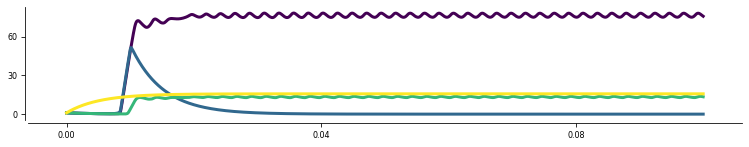

In [35]:
fig, ax=ge.figure(figsize=(3,2))
#ge.plot(t, Y=[Fmf['pyrExc']+1e-2, Fmf['oscillExc']+1e-2], ax=ax, COLORS=['k', ge.brown])
ge.plot(t, Y=X.T, ax=ax, lw=3)

[ 7927.55438942  8218.15566795 15921.10877883    72.        ]


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7efc54e3da90>)

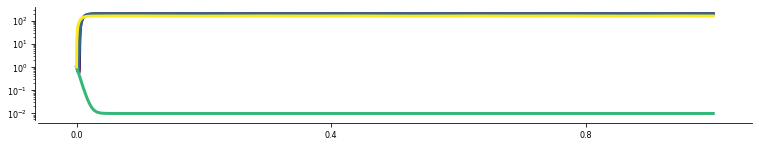

In [69]:
dt, tstop = 1e-4, 1.
t = np.arange(int(tstop/dt))*dt
Y = np.ones((len(t),len(REC_POPS)))*1

def Fexc_over_pops(X, t):
    return np.dot(np.concatenate([X, [3.,3.]]), Cexc)

def Finh_over_pops(X, t):
    return np.dot(np.concatenate([X, [3.,3.]]), Cinh)

def growth_factor(X, t):
    
    #Fexc_over_pops = np.dot(np.concatenate([X, func_Fafferent(t)]), Cexc)
    #Finh_over_pops = np.dot(np.concatenate([X,func_Fafferent(t)]), Cinh)
    
    return np.array([func([Fexc_over_pops(X,t)[i],
                           Finh_over_pops(X,t)[i],
                           100*(1-np.cos(2*np.pi*3*t))])[0] for i in range(len(REC_POPS))])


tau=5e-3
for it, tt in enumerate(t[1:]):
    Y[it+1,:] = Y[it,:]+dt*(growth_factor(Y[it,:],tt)-Y[it,:])/tau
    
print(Fexc_over_pops(Y[-1], t[-1]))
fig, ax=ge.figure(figsize=(3,2))
#ge.plot(t, Y=Y.T+1e-2, ax=ax, lw=3, axes_args=dict(yscale='log'))


In [70]:
Cexc

array([[40., 40., 80.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 5.,  0., 20., 20.],
       [ 4., 40., 20.,  4.]])

[ 28.2 132.  126.   73.2] [0. 0. 0. 0.]


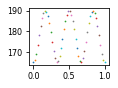

In [542]:
X = [0, 0, 0, 0]
t=.3
Fexc_over_pops = np.dot(Cexc.T,
                            np.concatenate([X, func_Fafferent(t)]))
Finh_over_pops = np.dot(Cinh.T,
                            np.concatenate([X,func_Fafferent(t)]))

i=1
print(Fexc_over_pops, Finh_over_pops)
fig, ax = ge.figure()
for t in np.linspace(0,1):
    #ax.scatter([t], [func([Fexc_over_pops[i], Finh_over_pops[i], func_Iintrinsic(t)[i]])], s=0.5)
    ax.scatter([t], [func([160, 0, func_Iintrinsic(t)[i]])], s=0.5)


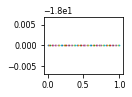

In [527]:
X = np.ones(4)*1e-1
i=1
fig, ax = ge.figure()
for t in np.linspace(0,1):
    ax.scatter([t], [dX_dt(X,t)[i]], s=0.5)

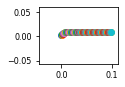

In [528]:
X = np.ones(4)*0

dt = 1e-3

fig, ax= ge.figure()
for it in range(100):
    X = X + dX_dt(X,it*dt)*dt
    ax.scatter([it*dt], [X[1]])
    #ax.scatter([it*dt], [dX_dt(X,float(it*dt))[1]])
                

(<Figure size 147.402x130.394 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febdad6eb90>)

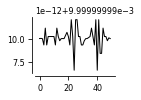

In [430]:
ge.plot([func([40, 0, func_Iintrinsic(tt)[1]]) for tt in np.linspace(0,1)])

(<Figure size 147.402x130.394 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febdd9fc8d0>)

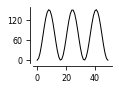

In [239]:
ge.plot([func_Iintrinsic(tt)[1] for tt in np.linspace(0,1)])

In [410]:
np.dot(np.concatenate([F,A]), Cexc)

array([ 49.,  81., 120.,  24.])

In [131]:
REC_POPS

['pyrExc', 'oscillExc', 'recInh', 'dsInh']

In [43]:
Cexc

array([[0.01, 0.01, 0.02, 0.  ],
       [0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.2 , 0.2 ],
       [0.02, 0.2 , 0.1 , 0.02]])

In [271]:
from scipy.interpolate import RegularGridInterpolator

def Intrinsic_Oscill(t, pop, Model):
    signal = 0*t
    cond = t>Model['%s_Ioscill_onset'%pop]
    signal[cond] = Model['%s_Ioscill_amp'%pop]*(1-np.cos(2.*np.pi*Model['%s_Ioscill_freq'%pop]*(t[cond]-t[cond][0])))/2.
    return signal

from analyz.processing.signanalysis import gaussian_smoothing
def IncreasingSteps(t, pop, Model):
    signal = 0*t+Model['%s_IncreasingStep_baseline'%pop]
    i, t0 = 1, Model['%s_IncreasingStep_t0'%pop]
    while t0<t[-1]:
        signal[t>t0] = Model['%s_IncreasingStep_baseline'%pop]+i*Model['%s_IncreasingStep_size'%pop]
        t0+=Model['%s_IncreasingStep_length'%pop]
        i+=1
    
    return gaussian_smoothing(signal, int(Model['%s_IncreasingStep_smoothing'%pop]/(t[1]-t[0])))
    
class FastMeanField:

    def __init__(self, Model, REC_POPS, AFF_POPS):

        self.REC_POPS = REC_POPS
        self.AFF_POPS = AFF_POPS
        self.Model = Model
        
        # initialize time axis
        self.dt = Model['dt']
        self.t = np.arange(int(Model['tstop']/self.dt))*self.dt
        
        # initialize connectivity matrix
        self.initialize_Effective_Connectivity_Matrix(Model)
        self.compute_exc_inh_matrix_factors(Model)
        
        # initialize afferent input
        self.FAFF = np.zeros((len(self.t),len(self.AFF_POPS)))
        for ipop, pop in enumerate(AFF_POPS):
            if '%s_IncreasingStep_size'%pop in Model:
                print('Adding Increasing Step Waveform to:', pop)
                self.FAFF[:,ipop] = IncreasingSteps(self.t, pop, Model)
            else:
                print('Setting Constant Level to:', pop)
                self.FAFF[:,ipop] = 0*self.t+Model['F_%s'%pop]

        # intrinsic currents
        self.I_INTRINSINC = np.zeros((len(self.t),len(self.REC_POPS)))
        for ipop, pop in enumerate(REC_POPS):
            # only support for time-phase-locked oscillatory current so far
            if '%s_Ioscill_freq'%pop in Model:
                print('Adding intrinsic oscillation to:', pop)
                self.I_INTRINSINC[:,ipop] = Intrinsic_Oscill(self.t, pop, Model)

        # matrix
        self.compute_exc_inh_matrix_factors(Model)

        self.TF_func = None # to be initialized !
        
    # initialize Effective Connectivity
    def initialize_Effective_Connectivity_Matrix(self, Model):
        self.ecMatrix = np.zeros((len(self.REC_POPS)+len(self.AFF_POPS), len(self.REC_POPS)))
        for i, ii in enumerate(self.REC_POPS+self.AFF_POPS):
            for j, jj in enumerate(self.REC_POPS):
                self.ecMatrix[i,j] = Model['p_%s_%s' % (ii,jj)]*Model['N_%s' % ii]


    def compute_exc_inh_matrix_factors(self, Model):
        self.CexcF = np.zeros((len(self.REC_POPS)+len(self.AFF_POPS), len(self.REC_POPS)))
        self.CinhF = np.zeros((len(self.REC_POPS)+len(self.AFF_POPS), len(self.REC_POPS)))
        for i, ii in enumerate(self.REC_POPS+self.AFF_POPS):
            for j, jj in enumerate(self.REC_POPS):
                if len(ii.split('Exc'))>1:
                    self.CexcF[i,j] = 1.
                elif len(ii.split('Inh'))>1:
                    self.CinhF[i,j] = 1.
                else:
                    raise NameError('/!\ %s is not classified as Exc or Inh' % ii+jj)

                
    def compute_exc_inh_matrices(self, ecMatrix):
        # just separates excitation and inhibition
        return np.multiply(ecMatrix, sim.CexcF), np.multiply(ecMatrix, sim.CinhF)

    
    def build_TF_func(self, Ngrid=20, coeffs_location='data/COEFFS_pyrExc.npy', pop=None):
        """
        """

        print('Initializing simulation [...]')
        if pop is None:
            pop = self.REC_POPS[0]
            
        # taking just one Exc and One Inh pop for the scan !!
        Exc_pop = [rec for rec in REC_POPS if len(rec.split('Exc'))>1][0]
        Inh_pop = [rec for rec in REC_POPS if len(rec.split('Inh'))>1][0]
        
        # building artificial simulation situation (with just one exc and one inh)
        AFF_POPS = [Exc_pop, Inh_pop]
        Model2 = self.Model.copy()
        Model2['N_%s'%Exc_pop], Model2['N_%s'%Inh_pop] = 10, 10
        Model2['p_%s_%s'%(Exc_pop, pop)], Model2['p_%s_%s'%(Inh_pop, pop)] = 0.1, 0.1
        
        nrn_params = ntwk.built_up_neuron_params(Model2, pop)
        syn_input = ntwk.build_up_afferent_synaptic_input(Model2,
                                                          AFF_POPS, pop)
        Model2['COEFFS'] = np.load(coeffs_location)
        Freq_Exc = np.logspace(-2, 3, Ngrid+1)
        Freq_Inh = np.logspace(-2, 3, Ngrid)
        Ioscill = np.linspace(0, 20*10, int(Ngrid/2))
        output_freq = np.zeros((len(Freq_Exc), len(Freq_Inh), len(Ioscill)))

        print('Performing grid simulation [...]')
        for i, j, k in itertools.product(range(len(Freq_Exc)), range(len(Freq_Inh)),
                                         range(len(Ioscill))):
            if Freq_Exc[i]<10:
                output_freq[i,j,k] = 0
            else:
                output_freq[i,j,k] = ntwk.mean_field.input_output(nrn_params, syn_input,
                                        {'F_%s'%Exc_pop:Freq_Exc[i], 'F_%s'%Inh_pop:Freq_Inh[j]},
                                        Model2['COEFFS'],
                                        current_input=Ioscill[k])
        print('Building interpolation [...]')
        self.TF_func = RegularGridInterpolator([Freq_Exc*\
                                                Model2['p_%s_%s'%(Exc_pop, pop)]*Model2['N_%s'%Exc_pop],
                                                Freq_Inh*\
                                                Model2['p_%s_%s'%(Inh_pop, pop)]*Model2['N_%s'%Inh_pop],
                                                Ioscill],
                                               output_freq,
                                               method='linear',
                                               fill_value=None, bounds_error=False)
        print('--> Done !')

    def rise_factor(self, X, t, Cexc, Cinh):
        return self.TF_func(np.array([np.dot(np.concatenate([X, self.FAFF[int(t/self.dt),:]]), Cexc),
                              np.dot(np.concatenate([X, self.FAFF[int(t/self.dt),:]]), Cinh),
                              self.I_INTRINSINC[int(t/self.dt),:]]).T)

    
    def dX_dt(self, X, t, Cexc, Cinh, tau=5e-3):
        return (self.rise_factor(X,t,Cexc,Cinh)-X)/tau

        
    def run_single_connectivity_sim(self, ecMatrix):
        
        X = np.zeros((len(self.t), len(self.REC_POPS)))
        
        if self.TF_func is None:
            raise NameError('/!\ Need to run the "build_TF_func" protocol before')
        else:
            Cexc, Cinh = self.compute_exc_inh_matrices(ecMatrix)
            # simple forward Euler iteration
            for it, tt in enumerate(self.t[:-1]):
                X[it+1,:] = X[it,:]+self.dt*self.dX_dt(X[it,:], tt, Cexc, Cinh)
                
        return X

Model['tstop'] = 1
Model['dt'] = 5e-3
from model import Model
sim = FastMeanField(Model, REC_POPS, AFF_POPS)

KeyError: 'p_Exc_Exc'

In [ ]:
sim = FastMeanField(Model, REC_POPS, AFF_POPS)
sim.build_TF_func(Ngrid=40)
X = sim.run_single_connectivity_sim(sim.ecMatrix)

In [261]:
sim.build_TF_func(Ngrid=40)

Initializing simulation [...]
Performing grid simulation [...]
Building interpolation [...]
--> Done !


(<Figure size 147.402x130.394 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd9245d6150>)

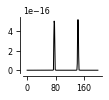

In [264]:
ge.plot(X[:,0])

In [263]:
X = sim.run_single_connectivity_sim(sim.ecMatrix)

In [201]:
sim.compute_exc_inh_matrices(sim.ecMatrix)

(array([[40., 40., 80., 40.],
        [ 1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 5.,  1., 20., 20.],
        [ 4., 40., 20.,  4.]]), array([[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [ 50., 100.,  50.,  10.],
        [  5.,   5.,  50.,   5.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]]))

In [188]:
np.multiply(sim.ecMatrix, sim.CinhF)

array([[  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [ 50., 100.,  50.,  10.],
       [  5.,   5.,  50.,   5.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.]])

In [189]:
Cinh

array([[  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [ 50., 100.,  50.,  10.],
       [  5.,   5.,  50.,   5.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.]])

In [111]:
x1 = np.dot(np.concatenate([X[0,:], FAFF[int(0/dt),:]]), Cexc)
x2 = np.dot(np.concatenate([X[0,:], FAFF[int(0/dt),:]]), Cexc)
x3 = I_INTRINSINC[int(0/dt),:]
func(np.array([x1,x2,x3]).T)

array([4.04107991e-14, 8.21929403e-09, 5.81159384e-14, 3.77449615e-15])

In [193]:
REC_POPS = ['oscillExc', 'recInh']
AFF_POPS = ['AffExc']
# adding the same LIF props to all recurrent pops
LIF_props = {'Gl':10., 'Cm':200.,'Trefrac':5.,
             'El':-70, 'Vthre':-50., 'Vreset':-70., 'deltaV':0.,
             'a':0., 'b': 0., 'tauw':1e9}

In [194]:
Model = {
    'N_oscillExc':1000, 'N_recInh':1000, 'N_AffExc':100,
    'Tse':5., 'Tsi':5.,
    'Ee':0., 'Ei': -80.,
    'F_AffExc':2.}
Model['oscillExc_Ioscill_freq']=3.
Model['oscillExc_Ioscill_amp']= 10.*15.
# cellular features
for pop in REC_POPS:
    for key, val in LIF_props.items():
        Model['%s_%s' % (pop, key)] = val
for aff in REC_POPS+AFF_POPS:
    for target in REC_POPS:
        if len(aff.split('Exc'))>0:
            Model['Q_%s_%s' % (aff, target)] = 2.
        if len(aff.split('Inh'))>0:
            Model['Q_%s_%s' % (aff, target)] = 10.
        else:
            print('Interaction: %s -> %s not recognized as Exc or Inh !!' % (aff, target))
        # === initializing connectivity === #         
        Model['p_%s_%s' % (aff, target)] = 0. # zero connectivity by default
Model['p_AffExc_oscillExc'] = 0.1
Model['p_oscillExc_oscillExc'] = 0.

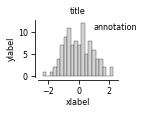

In [232]:
ge = graph_env()
fig, ax = ge.hist(np.random.randn(100),
                  axes_args=dict(xlabel='xlabel', ylabel='ylabel'))
ge.title(ax, 'title')
ge.annotate(ax, 'annotation', (.7,.8), xycoords='axes fraction')

In [222]:
func([20., 0., 0.])

array([6.80471688e-18])

(<Figure size 453.543x260.787 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa287fb2f50>)

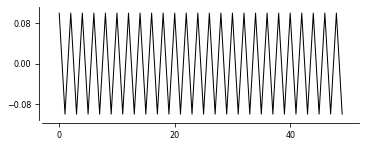

In [221]:
tstop, dt = 500e-3, 10e-3
tau=5e-3
t = np.arange(int(tstop/dt))*dt
Y = np.ones((len(t),len(REC_POPS)))*0.1

Connectivity_Matrix = None
# Connectivity matrix of size (a+f, f)
C = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
Cexc, Cinh = 0*C, 0*C
# building the connectivities for the ODE solver
for i, ii in enumerate(REC_POPS+AFF_POPS):
    for j, jj in enumerate(REC_POPS):
        if Connectivity_Matrix is None:
            C[i,j] = Model['p_%s_%s' % (ii,jj)]*Model['N_%s' % ii]
        else:
            C[i,j] = Connectivity_Matrix[i,j]
        if len(ii.split('Exc'))>1:
            Cexc[i,j] = C[i,j]
        elif len(ii.split('Inh'))>1:
            Cinh[i,j] = C[i,j]
        else:
            print('/!\ %s is not classified as Exc or Inh' % ii+jj)

def Fexc_over_pops(X, t):
    return np.dot(np.concatenate([X, [Model['F_AffExc']]]), Cexc)

def Finh_over_pops(X, t):
    return np.dot(np.concatenate([X, [Model['F_AffExc']]]), Cinh)

def growth_factor(X, t):
    return np.array([func([Fexc_over_pops(X,t)[i],
                           Finh_over_pops(X,t)[i],
                           0*(1-np.cos(2*np.pi*3*t))])[0] for i in range(len(REC_POPS))])


for it, tt in enumerate(t[1:]):
    Fout = growth_factor(Y[it,:],tt)
    # print(Fout, dt*(Fout-Y[it,:])/tau)
    Y[it+1,:] = Y[it,:]+dt*(Fout-Y[it,:])/tau
    
ge.plot(Y[:,0], fig_args={'figsize':(2,2)}) 


(<Figure size 453.543x260.787 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa28c2521d0>)

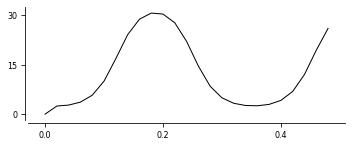

In [208]:
ge.plot(t, X['oscillExc'], fig_args={'figsize':(2,2)})

In [275]:
Model = {
    'N_Exc':1000, 'N_AffInh':1, 'N_AffExc':1,
    'Tse':5., 'Tsi':5.,
    'Ee':0., 'Ei': -80.,
    'F_AffExc':2., 'F_AffInh':2.}
# cellular features
for pop in REC_POPS:
    for key, val in LIF_props.items():
        Model['%s_%s' % (pop, key)] = val
for aff in REC_POPS+AFF_POPS:
    for target in REC_POPS:
        if len(aff.split('Exc'))>0:
            Model['Q_%s_%s' % (aff, target)] = 2.
        if len(aff.split('Inh'))>0:
            Model['Q_%s_%s' % (aff, target)] = 10.
        else:
            print('Interaction: %s -> %s not recognized as Exc or Inh !!' % (aff, target))
        # === initializing connectivity === #         
        Model['p_%s_%s' % (aff, target)] = 0. # zero connectivity by default
Model['p_AffExc_Exc'] = 1
Model['p_AffInh_Exc'] = 1

In [207]:
#from model import Model, REC_POPS, AFF_POPS
from analyz.processing.signanalysis import gaussian_smoothing as smooth

import neural_network_dynamics.main as ntwk

tstop, dt = 500e-3, 20e-3
t = np.arange(int(tstop/dt))*dt

DYN_SYSTEM, INPUTS = {}, {}
for rec in REC_POPS:
    Model['COEFFS_%s' % rec] = np.load('data/COEFFS_pyrExc.npy')
    # DYN_SYSTEM[rec] = {'aff_pops':['AffExc', 'NoiseExc'], 'x0':1e-1}
    DYN_SYSTEM[rec] = {'aff_pops':['AffExc'], 'x0':1e-1}
    # INPUTS['AffExc_%s' % rec] = smooth(np.array([4.*int(tt) for tt in t]), int(.2/dt))
    INPUTS['AffExc_%s' % rec] = Model['F_AffExc']+0*t
    # INPUTS['NoiseExc_%s' % rec] = 3+0*t

CURRENT_INPUTS = {'oscillExc':Model['oscillExc_Ioscill_amp']*(1-np.cos(Model['oscillExc_Ioscill_freq']*2*np.pi*t))/2.}

X = ntwk.mean_field.solve_mean_field_first_order(Model,
                                                 DYN_SYSTEM,
                                                 INPUTS=INPUTS,
                                                 CURRENT_INPUTS=CURRENT_INPUTS,
                                                 dt=dt, tstop=tstop)


2.6005583810190283
0.0
[500.11167620380564, -20.0]
2.6005583810190283
0.0
[500.08498164487065, -19.998932456081107]
2.6005583810190283
0.0
[500.0849830697514, -19.998932513063608]
2.6005583810190283
0.0
[500.058289935545, -19.99786502612113]
2.6005583810190283
0.0
[500.05829136034964, -19.997865083100592]
2.6005583810190283
0.0
[498.5301878659616, -19.93675459250027]
2.6005583810190283
0.0
[498.53018428209094, -19.93675444917746]
2.6005583810190283
0.0
[497.00675403879603, -19.875830846878912]
2.6005583810190283
0.0
[497.00674688198944, -19.875830560670575]
2.6005583810190283
0.0
[495.48797203051686, -19.815093132462497]
2.6005583810190283
0.0
[495.48796489557213, -19.81509284712844]
2.6005583810190283
0.0
[488.4561594157827, -19.533883436735717]
2.6005583810190283
0.0
[488.45609667497047, -19.53388092766363]
2.6005583810190283
0.0
[490.46216781417644, -19.61410585480125]
2.6005583810190283
0.0
[490.4621354677038, -19.61410456123126]
2.6005583810190283
0.0
[485.4872426466974, -19.41515

5.864710782795199
0.0
[424.06933559352086, -0.00012215729081709015]
5.864710782795199
0.0
[424.06933559347584, -0.00012215729081707714]
5.864710782795199
0.0
[423.0365172824806, -0.00012185977747152749]
5.864710782795199
0.0
[423.03651728220314, -0.00012185977747144757]
5.864710782795199
0.0
[422.0062143937175, -0.0001215629887177824]
5.864710782795199
0.0
[422.00621439370394, -0.00012156298871777848]
5.864710782795199
0.0
[420.9784208016943, -0.00012126692279133429]
5.864710782795199
0.0
[420.9784208016806, -0.00012126692279133032]
5.864710782795199
0.0
[410.8371590522981, -0.00011834563384918656]
5.864710782795199
0.0
[410.83715901484226, -0.00011834563383839732]
5.864710782795199
0.0
[400.9401977086676, -0.000115494718011642]
5.864710782795199
0.0
[400.9401976301307, -0.00011549471798902203]
5.864710782795199
0.0
[391.2816513658617, -0.0001127124799306519]
5.864710782795199
0.0
[391.28165149501626, -0.00011271247996785947]
5.864710782795199
0.0
[381.8557771894316, -0.000109997265326

0.0
[1225.2559464680367, -3.641726386748379e-08]
17.009423341468935
0.0
[1099.942680393788, -3.2692681840457154e-08]
17.009423341468935
0.0
[1099.9426974480673, -3.26926823473476e-08]
17.009423341468935
0.0
[987.4457814253752, -2.93490300378939e-08]
17.009423341468935
0.0
[987.445876760465, -2.934903287146245e-08]
17.009423341468935
0.0
[886.4547629000767, -2.6347357954206794e-08]
17.009423341468935
0.0
[886.4546733105541, -2.6347355291417416e-08]
17.009423341468935
0.0
[795.79252081775, -2.3652679505803247e-08]
17.009423341468935
0.0
[795.7923708414256, -2.365267504818367e-08]
17.009423341468935
0.0
[714.4026350802523, -2.123359559636482e-08]
17.009423341468935
0.0
[714.4025754360506, -2.1233593823609898e-08]
17.009423341468935
0.0
[641.3369872332996, -1.906192608930277e-08]
17.009423341468935
0.0
[641.3369322758559, -1.9061924455848404e-08]
17.009423341468935
0.0
[575.744136319624, -1.7112364312900408e-08]
17.009423341468935
0.0
[575.7440902699461, -1.711236294420407e-08]
17.00942334

30.363384139837393
0.0
[-61.697422124730394, -4.635754509073997e-15]
30.363384139837393
0.0
[-61.55438126748365, -4.635754448688891e-15]
30.363384139837393
0.0
[-61.69742197859165, -4.6357546063795075e-15]
30.363384139837393
0.0
[-61.52577316946903, -4.6357543877158505e-15]
30.706682415113868
0.0
[6.990134027713424, -4.654332261097851e-15]
30.706682415113868
0.0
[6.9901410248448315, -4.654336920089051e-15]
30.706682415113868
0.0
[6.9831508768274375, -4.6496825785130774e-15]
30.706682415113868
0.0
[6.983157866975631, -4.649687232854651e-15]
30.706682415113868
0.0
[6.96920551057616, -4.640397153115269e-15]
30.706682415113868
0.0
[6.969205496616837, -4.64039714382054e-15]
30.363384139837393
0.0
[-61.70437401727753, -4.631125639637416e-15]
30.363384139837393
0.0
[-61.63571439018014, -4.631125621052565e-15]
30.363384139837393
0.0
[-61.704387969647456, -4.631116349548388e-15]
30.363384139837393
0.0
[-61.56704078280626, -4.6311349111369204e-15]
30.706682415113868
0.0
[6.9687744402394, -4.6401

14.509945678992764
0.0
[-835.0014039042144, -1.5627632232565303e-20]
14.509945678992764
0.0
[-740.3367038389497, -1.3855916507168108e-20]
14.509945678992764
0.0
[-740.3363198962502, -1.3855909321413097e-20]
14.509945678992764
0.0
[-656.4036553249913, -1.2285051107180252e-20]
14.509945678992764
0.0
[-656.4035366720311, -1.2285048886507555e-20]
14.509945678992764
0.0
[-581.98642131131, -1.089228079626475e-20]
14.509945678992764
0.0
[-581.986302029734, -1.0892278563827049e-20]
14.509945678992764
0.0
[-516.005926014676, -9.657409920363093e-21]
14.509945678992764
0.0
[-516.00583734336, -9.657408260817724e-21]
14.509945678992764
0.0
[-445.2411907703258, -8.332998665169053e-21]
14.509945678992764
0.0
[-445.2410253498506, -8.33299556920978e-21]
14.509945678992764
0.0
[-384.1812140445725, -7.190218717809227e-21]
14.509945678992764
0.0
[-384.18086661963855, -7.190212215509855e-21]
14.509945678992764
0.0
[-331.49473809373757, -6.204154663377989e-21]
14.509945678992764
0.0
[-331.4944814415973, -6.

[-311.5632466569377, -1.6187409443258514e-25]
3.350067065525222
0.0
[-306.21405658040214, -1.5909489852652767e-25]
3.350067065525222
0.0
[-306.2140565834399, -1.5909489852810593e-25]
3.350067065525222
0.0
[-300.9567060764736, -1.5636341828593555e-25]
3.350067065525222
0.0
[-300.9567060794549, -1.5636341828748442e-25]
3.350067065525222
0.0
[-267.1960739765126, -1.3882292913232035e-25]
3.350067065525222
0.0
[-267.1960796288447, -1.388229320690061e-25]
3.350067065525222
0.0
[-237.22260691110435, -1.2325007870711246e-25]
3.350067065525222
0.0
[-237.22264063784095, -1.2325009622984345e-25]
3.350067065525222
0.0
[-210.61158253915747, -1.094242005963239e-25]
3.350067065525222
0.0
[-210.61154715100585, -1.0942418220992537e-25]
3.350067065525222
0.0
[-186.98569136330167, -9.714926194309211e-26]
3.350067065525222
0.0
[-186.98562804251216, -9.714922904437266e-26]
3.350067065525222
0.0
[-166.010040562586, -8.625126766756281e-26]
3.350067065525222
0.0
[-166.01001233474247, -8.625125300165314e-26]
3

3.056239915527065
0.0
[85.52358521562739, -1.0759142851048385e-30]
2.62665941249819
0.0
[-0.3390260436074044, -1.0765754748258205e-30]
2.62665941249819
0.0
[-0.33902604364444144, -1.0765754749435143e-30]
2.62665941249819
0.0
[-0.3390224988974566, -1.0765642186176286e-30]
2.62665941249819
0.0
[-0.33902249893449365, -1.0765642187353212e-30]
2.62665941249819
0.0
[-0.3390154095888498, -1.0765417065543163e-30]
2.62665941249819
0.0
[-0.3390083203914429, -1.076519194844068e-30]
2.62665941249819
0.0
[-0.339001231342273, -1.0764966836045626e-30]
2.62665941249819
0.0
[-0.3389303490034301, -1.076271597098592e-30]
2.62665941249819
0.0
[-0.33885948148526523, -1.0760465576556865e-30]
3.056239915527065
0.0
[85.5773119769898, -1.0758215652672736e-30]
3.056239915527065
0.0
[85.56982605171379, -1.0758215652672743e-30]
3.056239915527065
0.0
[85.57731197698936, -1.0758215652689138e-30]
3.056239915527065
0.0
[85.56832886665893, -1.0758215652664542e-30]
3.056239915527065
0.0
[85.57725529631135, -1.076001554

0.0
[549.5786177948121, -3.609601941657493e-34]
7.002852235354842
0.0
[549.5812012289967, -3.609601941495324e-34]
7.002852235354842
0.0
[549.5760343606273, -3.609601941819663e-34]
4.277456964164962
0.0
[4.502186898804794, -3.6096339376108237e-34]
4.277456964164962
0.0
[4.502184129804476, -3.6096317175613193e-34]
7.002852235354842
0.0
[549.5812328297849, -3.6096272774664078e-34]
7.002852235354842
0.0
[549.5808975871399, -3.6096272774664078e-34]
7.002852235354842
0.0
[549.5812328297815, -3.609627277463677e-34]
7.002852235354842
0.0
[549.5805623444985, -3.6096272774691387e-34]
4.277456964164962
0.0
[4.5021831323310835, -3.609630917835784e-34]
7.002852235354842
0.0
[549.5812363728324, -3.609630118109237e-34]
7.002852235354842
0.0
[549.5811156086061, -3.6096301181094142e-34]
4.277456964164962
0.0
[4.50218270900411, -3.6096305784328756e-34]
7.002852235354842
0.0
[549.5812365236529, -3.6096302390298544e-34]
7.002852235354842
0.0
[549.5811852714565, -3.6096302390298864e-34]
7.002852235354842
0

0.0
[700.7776925413339, -5.684941086794926e-38]
19.56287817827551
0.0
[700.7780737729057, -5.684944179471895e-38]
19.56287817827551
0.0
[620.8323231246652, -5.036397732557075e-38]
19.56287817827551
0.0
[620.8315601579087, -5.036391543117673e-38]
19.56287817827551
0.0
[550.0059471349197, -4.4618306777287066e-38]
19.56287817827551
0.0
[550.0056094491093, -4.4618279383094114e-38]
19.56287817827551
0.0
[487.25974482526124, -3.9528126719515273e-38]
19.56287817827551
0.0
[487.25964550047746, -3.9528118661959357e-38]
19.56287817827551
0.0
[431.67198969367246, -3.5018663641085145e-38]
19.56287817827551
0.0
[431.67188630686013, -3.501865525400398e-38]
19.56287817827551
0.0
[382.4257713461904, -3.102364706118212e-38]
19.56287817827551
0.0
[382.4257141830948, -3.102364242392228e-38]
19.56287817827551
0.0
[326.50669653474364, -2.6487306231349106e-38]
19.56287817827551
0.0
[326.5065217984393, -2.648729205616039e-38]
19.56287817827551
0.0
[278.76438031893184, -2.2614291180744916e-38]
19.562878178275

In [6]:
REC_POPS = ['Exc']
AFF_POPS = ['AffExc', 'AffInh']
Model = {
    'N_Exc':1, 'N_AffInh':10, 'N_AffExc':10,
    'Tse':5., 'Tsi':5.,
    'Ee':0., 'Ei': -80.,
    'F_AffExc':100., 'F_AffInh':10.}
LIF_props = {'Gl':10., 'Cm':200.,'Trefrac':5.,
             'El':-70, 'Vthre':-50., 'Vreset':-70., 'deltaV':0.,
             'a':0., 'b': 0., 'tauw':1e9}
# cellular features
for pop in REC_POPS:
    for key, val in LIF_props.items():
        Model['%s_%s' % (pop, key)] = val
for aff in REC_POPS+AFF_POPS:
    for target in REC_POPS:
        if len(aff.split('Exc'))>0:
            Model['Q_%s_%s' % (aff, target)] = 2.
        elif len(aff.split('Inh'))>0:
            Model['Q_%s_%s' % (aff, target)] = 10.
        else:
            print('Interaction: %s -> %s not recognized as Exc or Inh !!' % (aff, target))
        # === initializing connectivity === #         
        Model['p_%s_%s' % (aff, target)] = 0. # zero connectivity by default
Model['p_AffExc_Exc'] = 0.1
Model['p_AffInh_Exc'] = 0.1

In [8]:

REC_POPS = ['Exc']
AFF_POPS = ['AffExc', 'AffInh']
Model = {
    'N_Exc':1, 'N_AffInh':10, 'N_AffExc':10,
    'Tse':5., 'Tsi':5.,
    'Ee':0., 'Ei': -80.,
    'F_AffExc':100., 'F_AffInh':10.}
LIF_props = {'Gl':10., 'Cm':200.,'Trefrac':5.,
             'El':-70, 'Vthre':-50., 'Vreset':-70., 'deltaV':0.,
             'a':0., 'b': 0., 'tauw':1e9}
# cellular features
for pop in REC_POPS:
    for key, val in LIF_props.items():
        Model['%s_%s' % (pop, key)] = val
for aff in REC_POPS+AFF_POPS:
    for target in REC_POPS:
        if len(aff.split('Exc'))>0:
            Model['Q_%s_%s' % (aff, target)] = 2.
        elif len(aff.split('Inh'))>0:
            Model['Q_%s_%s' % (aff, target)] = 10.
        else:
            print('Interaction: %s -> %s not recognized as Exc or Inh !!' % (aff, target))
        # === initializing connectivity === #         
        Model['p_%s_%s' % (aff, target)] = 0. # zero connectivity by default
Model['p_AffExc_Exc'] = 0.1
Model['p_AffInh_Exc'] = 0.1

import itertools

# mean field formalism
nrn_params = ntwk.built_up_neuron_params(Model, 'Exc')
syn_input = ntwk.build_up_afferent_synaptic_input(Model,
                                                  ['AffExc', 'AffInh'], 'Exc')
Model['COEFFS'] = np.load('data/COEFFS_pyrExc.npy')
# now approx
# scanning grid !
N = 100
Freq_Exc = np.logspace(-2, 3, N+1)
Freq_Inh = np.logspace(-2, 3, N)
Ioscill = np.linspace(0, 20*10, N-1)
output_freq = np.zeros((len(Freq_Exc), len(Freq_Inh), len(Ioscill)))
for i, j, k in itertools.product(range(len(Freq_Exc)), range(len(Freq_Inh)), range(len(Ioscill))):
    if Freq_Exc[i]<10:
        output_freq[i,j,k] = 0
    else:
        output_freq[i,j,k] = ntwk.mean_field.input_output(nrn_params, syn_input,
                                {'F_AffExc':Freq_Exc[i], 'F_AffInh':Freq_Inh[j]},
                                Model['COEFFS'],
                                current_input=Ioscill[k])
from scipy.interpolate import RegularGridInterpolator
func = RegularGridInterpolator([Freq_Exc*Model['p_AffExc_Exc']*Model['N_AffExc'],
                                Freq_Inh*Model['p_AffInh_Exc']*Model['N_AffInh'],
                                Ioscill],
                               output_freq,
                               method='linear',
                               fill_value=None, bounds_error=False)


In [9]:
I = 100
print(ntwk.mean_field.input_output(nrn_params, syn_input,
                                   {'F_AffExc': 100, 'F_AffInh': 10},
                                   Model['COEFFS'],
                                   current_input=I))
print(func([100, 10, 100])[0])

1.8959134784366254
1.896078166317099


In [23]:
dt, tstop = 1e-2, 3.
t = np.arange(int(tstop/dt))*dt

DYN_SYSTEM, INPUTS = {}, {}
for rec in REC_POPS:
    Model['COEFFS_%s' % rec] = np.load('data/COEFFS_pyrExc.npy')
    # DYN_SYSTEM[rec] = {'aff_pops':['AffExc', 'NoiseExc'], 'x0':1e-1}
    DYN_SYSTEM[rec] = {'aff_pops':['AffExc', 'AffInh'], 'x0':1e-1}
    # INPUTS['AffExc_%s' % rec] = smooth(np.array([4.*int(tt) for tt in t]), int(.2/dt))
    INPUTS['AffExc_%s' % rec] = Model['F_AffExc']+0*t
    INPUTS['AffInh_%s' % rec] = Model['F_AffInh']+0*t
    # INPUTS['NoiseExc_%s' % rec] = 3+0*t

CURRENT_INPUTS = {'Exc':100*(1-np.cos(3.*2*np.pi*t))/2.}

X = ntwk.mean_field.solve_mean_field_first_order(Model,
                                                 DYN_SYSTEM,
                                                 INPUTS=INPUTS,
                                                 CURRENT_INPUTS=CURRENT_INPUTS,
                                                 dt=dt, tstop=tstop)


running ODE integration [...]
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00042228860591863985
0.00

0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.08660475669779
0.19628937825301274
0.19628937825301274
0.196289

0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.50137529838557
0.50137529838557
0.50137529838557
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.50137529838557
0.50137529838557
0.50137529838557
0.50137529838557
0.50137529838557
0.50137529838557
0.50137529838557
0.50137529838557
0.8683567076035998
0.50137529838557
0.50137529838557
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.50137529838557
0.50137529838557
0.86

0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.00404673858

0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.027159447931530963
0.06504995443

1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.7701978190044623
1.7701978190044623
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784366254
1.8959134784

0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.001409884847556723
0.001409884847556723
0.001409884847556723
0.0025549641849196784
0.0025549641849196784
0.0025549641849196784
0.00255496418

0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.004046738584153179
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.008751566564971473
0.00875156656

1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.6777055556299882
1.6777055556299882
1.6777055556299882
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.2987537149885329
1.6777055556299882
1.6777055556299882
1.6777055556299882
1.6777055556299882
1.6777055556299882
1.6777055556

0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.01526064932

0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0006860264400044822
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0006860264400044822
0.0006860264400044822
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0006860264400044822
0.0006860264400044822
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.00101465

1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.1545183907837184
1.1545183907837184
1.1545183907

0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.1146637551674983
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997

0.011518308272011677
0.005181365399350836
0.005181365399350836
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.011518308272011677
0.01151830827

1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.7701978190044623
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175

0.002554964184919683
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.005181365399350822
0.002554964184919683
0.002554964184919683
0.002554964184919683
0.00255496418

0.008751566564971475
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.0203228807201021
0.04867899

1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.5652915029395313
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.5652915029395313
1.5652915029

0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.015260649323422653
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.006702857925873605
0.01526064932

0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0010146524112493263
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.0016962305365116755
0.00169623

0.7347566008977299
0.7347566008977299
0.40475106575629716
0.7347566008977299
0.7347566008977299
0.40475106575629716
0.7347566008977299
0.7347566008977299
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.7347566008977299
0.7347566008977299
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.40475106575629716
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.7347566008977299
0.73475660

0.8683567076035998
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.8683567076035998
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983855672
0.5013752983

0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0011879052316421577
0.0011879052316421577
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0011879052316421577
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.0007711688542144932
0.00077116

0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480519455
0.3221103480

1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.0095549740338905
1.0095549740338905
1.0095549740338905
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.0095549740338905
1.0095549740338905
1.0095549740338905
1.0095549740338905
1.0095549740338905
1.0095549740338905
1.437355096264175
1.437355096264175
1.437355096264175
1.437355096264175
1.0095549740338905
1.0095549740338905
1.0095549740338905
1.0095549740338905
1.437355096264175
1.437355096264175
1.4373550962641

0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0004892120561018513
0.0004892120561018513
0.0004892120561018513
0.0004892120561018513
0.0004892120561018513
0.0004892120561018513
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0006184058111108288
0.0004892120561018513
0.0004892120561018513
0.0004892120561018513
0.0004892120561018513
0.0006184058111108288
0.0006184058111108288
0.0004892120561018513
0.0004892120561018513
0.0004892120561018513
0.00048921

0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.1146637551674974
0.1146637551674974
0.1146637551674974
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.048678997466362055
0.1146637551674974
0.1146637551674974
0.1146637551674974
0.1146637551674974
0.1146

0.7347566008977389
0.7347566008977389
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
1.1545183907837184
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
1.1545183907837184
1.1545183907837184
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008977389
0.7347566008

0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0005223452420844631
0.0005223452420844631
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0005223452420844631
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0004451193229830507
0.0005223452420844631
0.0005223452420844631
0.00052234

(<Figure size 918.425x260.787 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f40e0267c10>)

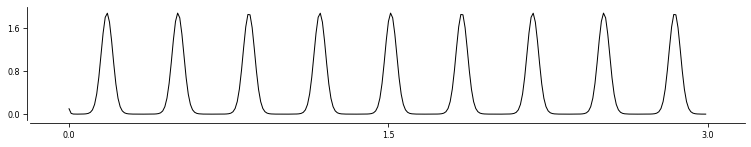

In [24]:
ge.plot(t, X['Exc'], fig_args={'figsize':(3,2)})

Adding Increasing Step Waveform to: AffExc
Setting Constant Level to: NoiseExc
Adding intrinsic oscillation to: oscillExc
Initializing simulation [...]
Performing grid simulation [...]
Building interpolation [...]
--> Done !
Euler comput. took 197.3 micro-sec


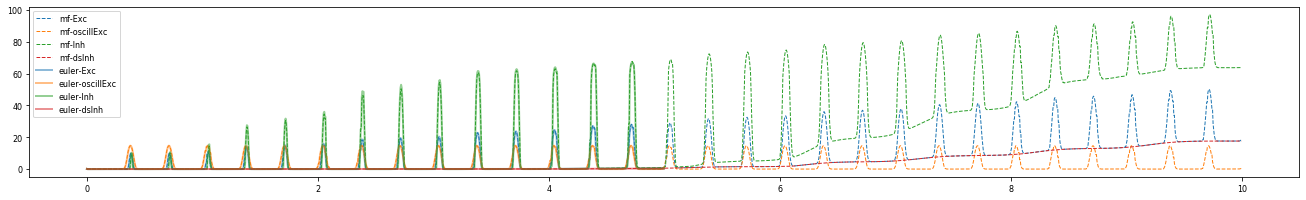

In [279]:
REC_POPS = ['Exc', 'oscillExc', 'Inh', 'dsInh']
AFF_POPS = ['AffExc', 'NoiseExc']
Model = {
    'N_Exc':1000, 'N_oscillExc':200, 'N_Inh':800, 'N_dsInh':800,
    'N_NoiseExc':100, 'N_AffExc':100,
    'Tse':5., 'Tsi':5.,
    'Ee':0., 'Ei': -80.,
    'F_AffExc':10., 'F_NoiseExc':5.,
    'tstop':10., 'dt':5e-3}
LIF_props = {'Gl':10., 'Cm':200.,'Trefrac':5.,
             'El':-70, 'Vthre':-50., 'Vreset':-70., 'deltaV':0.,
             'a':0., 'b': 0., 'tauw':1e9}

Model['oscillExc_Ioscill_freq']=3.
Model['oscillExc_Ioscill_amp']= 10.*15.
Model['oscillExc_Ioscill_onset']= .2 # 200ms delay for onset

Model['AffExc_IncreasingStep_t0']= 1.2 # 200ms delay for onset
Model['AffExc_IncreasingStep_baseline']= 0.
Model['AffExc_IncreasingStep_length']= 1.
Model['AffExc_IncreasingStep_size']= 4.
Model['AffExc_IncreasingStep_smoothing']= .2

dt, tstop = 5e-3, 5
t = np.arange(int(tstop/dt))*dt

Ioscill = Intrinsic_Oscill(t, 'oscillExc', Model)
F_AffExc = IncreasingSteps(t, 'AffExc', Model)
F_NoiseExc = Model['F_NoiseExc']+0*t

# cellular features
for pop in REC_POPS:
    for key, val in LIF_props.items():
        Model['%s_%s' % (pop, key)] = val
for aff in REC_POPS+AFF_POPS:
    for target in REC_POPS:
        if len(aff.split('Exc'))>0:
            Model['Q_%s_%s' % (aff, target)] = 2.
        elif len(aff.split('Inh'))>0:
            Model['Q_%s_%s' % (aff, target)] = 10.
        else:
            print('Interaction: %s -> %s not recognized as Exc or Inh !!' % (aff, target))
        # === initializing connectivity === #         
        Model['p_%s_%s' % (aff, target)] = 0. # zero connectivity by default
        
#
Model['p_AffExc_Exc'] = 0.1
Model['p_AffExc_Inh'] = 0.1
Model['p_AffExc_dsInh'] = 0.1
# 
Model['p_NoiseExc_Exc'] = 0.05
Model['p_NoiseExc_Inh'] = 0.05
Model['p_NoiseExc_dsInh'] = 0.05
Model['p_NoiseExc_oscillExc'] = 0.1
#
Model['p_oscillExc_Exc'] = 0.1
#
# Model['p_Exc_Exc'] = 0.03
Model['p_Exc_Inh'] = 0.03
# Model['p_Exc_dsInh'] = 0.03
#
# Model['p_Inh_Exc'] = 0.03
# Model['p_Inh_Inh'] = 0.03
# Model['p_Inh_dsInh'] = 0.03

DYN_SYSTEM, INPUTS = {}, {}
for rec in REC_POPS:
    Model['COEFFS_%s' % rec] = np.load('data/COEFFS_pyrExc.npy')
    # DYN_SYSTEM[rec] = {'aff_pops':['AffExc', 'NoiseExc'], 'x0':1e-1}
    DYN_SYSTEM[rec] = {'aff_pops':['AffExc', 'NoiseExc'], 'x0':1e-1}
    # INPUTS['AffExc_%s' % rec] = smooth(np.array([4.*int(tt) for tt in t]), int(.2/dt))
    INPUTS['AffExc_%s' % rec] = F_AffExc
    INPUTS['NoiseExc_%s' % rec] = F_NoiseExc

CURRENT_INPUTS = {'oscillExc':Ioscill}

Connectivity_Matrix = None
# Connectivity matrix of size (a+f, f)
C = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# connectivity matrix of excitatory interactions
Cexc = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# connectivity matrix of excitatory interactions
Cinh = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# building the connectivities for the ODE solver
for i, ii in enumerate(REC_POPS+AFF_POPS):
    for j, jj in enumerate(REC_POPS):
        if Connectivity_Matrix is None:
            C[i,j] = Model['p_%s_%s' % (ii,jj)]*Model['N_%s' % ii]
        else:
            C[i,j] = Connectivity_Matrix[i,j]
        if len(ii.split('Exc'))>1:
            Cexc[i,j] = C[i,j]
        elif len(ii.split('Inh'))>1:
            Cinh[i,j] = C[i,j]
        else:
            print('/!\ %s is not classified as Exc or Inh' % ii+jj)

FAFF = np.zeros((len(t),2))
FAFF[:,0] = F_AffExc
FAFF[:,1] = F_NoiseExc
I_INTRINSINC = np.zeros((len(t),len(REC_POPS)))
I_INTRINSINC[:,np.argwhere(np.array(REC_POPS)=='oscillExc')[0][0]] = Ioscill

def func2(x1, x2, x3):
    return func(np.array([x1, x2, x3]).T)

def growth_factor(X, t, Cexc=Cexc, Cinh=Cinh):
    Fexc_over_pops = np.dot(np.concatenate([X, FAFF[int(t/dt),:]]), Cexc)
    Finh_over_pops = np.dot(np.concatenate([X, FAFF[int(t/dt),:]]), Cinh)
    return func(np.array([Fexc_over_pops,
                          Finh_over_pops,
                          I_INTRINSINC[int(t/dt),:]]).T)
    
def dX_dt(X, t, Cexc=Cexc, Cinh=Cinh, tau=5e-3):
    return (growth_factor(X,t)-X)/tau

def Euler(dX_dt, X, t, dt, Cexc=Cexc, Cinh=Cinh):
    for it, tt in enumerate(t[:-1]):
        X[it+1,:] = X[it,:]+dt*dX_dt(X[it,:], tt)
    return X

sim = FastMeanField(Model, REC_POPS, AFF_POPS)
sim.build_TF_func(Ngrid=40)
X = sim.run_single_connectivity_sim(sim.ecMatrix)

fig, ax=ge.figure(figsize=(4,3))

for i, pop in enumerate(REC_POPS):
    ax.plot(sim.t, X[:,i], '--', lw=1, label='mf-%s' % pop, color=ge.colors[i])

# X = ntwk.mean_field.solve_mean_field_first_order(Model,
#                                                  DYN_SYSTEM,
#                                                  INPUTS=INPUTS,
#                                                  CURRENT_INPUTS=CURRENT_INPUTS,
#                                                  dt=dt, tstop=tstop, verbose=True)
# for i, pop in enumerate(REC_POPS):
#     ax.plot(t, X[pop], '--', lw=1, label='mf-%s' % pop, color=ge.colors[i])

start_time = time.time()
X = Euler(dX_dt, np.ones((len(t), len(REC_POPS)))*0.1, t, dt)
print('Euler comput. took %.1f micro-sec' % (1e3*time.time() - 1e3*start_time))
for i, pop in enumerate(REC_POPS):
    ax.plot(t, X[:,i], lw=2, label='euler-%s' % pop, color=ge.colors[i], alpha=.5)
ax.legend()


In [282]:
%timeit
X = sim.run_single_connectivity_sim(sim.ecMatrix)

In [47]:
X = Euler(dX_dt, X, t, dt)
ge.plot(t, X[:,0], ax=ax, lw=2, label='euler', color=ge.colors[1])


TypeError: unhashable type: 'slice'

running ODE integration [...]
--- ODE integration took 3.5 seconds ---
--- ODE integration took 2.1 seconds ---
--- ODE integration took 0.0 seconds ---
--- ODE integration took 0.0 seconds ---
--- ODE integration took 0.0 seconds ---
--- ODE integration took 0.0 seconds ---
--- ODE integration took 0.0 seconds ---


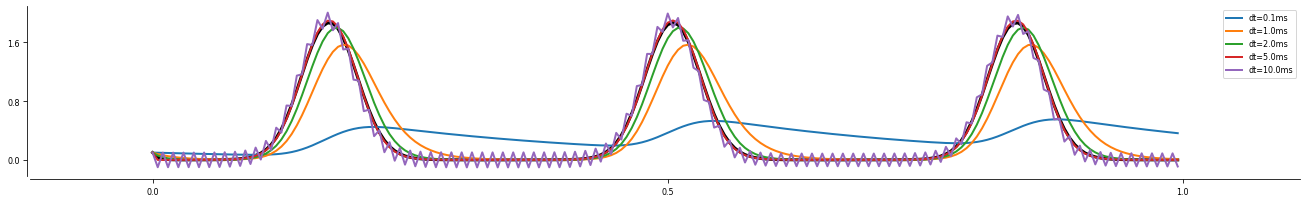

In [2]:
REC_POPS = ['Exc']
AFF_POPS = ['AffExc', 'AffInh']
Model = {
    'N_Exc':1, 'N_AffInh':10, 'N_AffExc':10,
    'Tse':5., 'Tsi':5.,
    'Ee':0., 'Ei': -80.,
    'F_AffExc':100., 'F_AffInh':10.}
LIF_props = {'Gl':10., 'Cm':200.,'Trefrac':5.,
             'El':-70, 'Vthre':-50., 'Vreset':-70., 'deltaV':0.,
             'a':0., 'b': 0., 'tauw':1e9}
# cellular features
for pop in REC_POPS:
    for key, val in LIF_props.items():
        Model['%s_%s' % (pop, key)] = val
for aff in REC_POPS+AFF_POPS:
    for target in REC_POPS:
        if len(aff.split('Exc'))>0:
            Model['Q_%s_%s' % (aff, target)] = 2.
        elif len(aff.split('Inh'))>0:
            Model['Q_%s_%s' % (aff, target)] = 10.
        else:
            print('Interaction: %s -> %s not recognized as Exc or Inh !!' % (aff, target))
        # === initializing connectivity === #         
        Model['p_%s_%s' % (aff, target)] = 0. # zero connectivity by default
Model['p_AffExc_Exc'] = 0.1
Model['p_AffInh_Exc'] = 0.1

import itertools

# mean field formalism
nrn_params = ntwk.built_up_neuron_params(Model, 'Exc')
syn_input = ntwk.build_up_afferent_synaptic_input(Model,
                                                  ['AffExc', 'AffInh'], 'Exc')
Model['COEFFS'] = np.load('data/COEFFS_pyrExc.npy')
# now approx
# scanning grid !
N = 100
Freq_Exc = np.logspace(-2, 3, N+1)
Freq_Inh = np.logspace(-2, 3, N)
Ioscill = np.linspace(0, 20*10, N-1)
output_freq = np.zeros((len(Freq_Exc), len(Freq_Inh), len(Ioscill)))
for i, j, k in itertools.product(range(len(Freq_Exc)), range(len(Freq_Inh)), range(len(Ioscill))):
    if Freq_Exc[i]<10:
        output_freq[i,j,k] = 0
    else:
        output_freq[i,j,k] = ntwk.mean_field.input_output(nrn_params, syn_input,
                                {'F_AffExc':Freq_Exc[i], 'F_AffInh':Freq_Inh[j]},
                                Model['COEFFS'],
                                current_input=Ioscill[k])
from scipy.interpolate import RegularGridInterpolator
func = RegularGridInterpolator([Freq_Exc*Model['p_AffExc_Exc']*Model['N_AffExc'],
                                Freq_Inh*Model['p_AffInh_Exc']*Model['N_AffInh'],
                                Ioscill],
                               output_freq,
                               method='linear',
                               fill_value=None, bounds_error=False)


dt, tstop = 1e-2, 3.
t = np.arange(int(tstop/dt))*dt

DYN_SYSTEM, INPUTS = {}, {}
for rec in REC_POPS:
    Model['COEFFS_%s' % rec] = np.load('data/COEFFS_pyrExc.npy')
    # DYN_SYSTEM[rec] = {'aff_pops':['AffExc', 'NoiseExc'], 'x0':1e-1}
    DYN_SYSTEM[rec] = {'aff_pops':['AffExc', 'AffInh'], 'x0':1e-1}
    # INPUTS['AffExc_%s' % rec] = smooth(np.array([4.*int(tt) for tt in t]), int(.2/dt))
    INPUTS['AffExc_%s' % rec] = Model['F_AffExc']+0*t
    INPUTS['AffInh_%s' % rec] = Model['F_AffInh']+0*t
    # INPUTS['NoiseExc_%s' % rec] = 3+0*t

CURRENT_INPUTS = {'Exc':100*(1-np.cos(3.*2*np.pi*t))/2.}

X = ntwk.mean_field.solve_mean_field_first_order(Model,
                                                 DYN_SYSTEM,
                                                 INPUTS=INPUTS,
                                                 CURRENT_INPUTS=CURRENT_INPUTS,
                                                 dt=dt, tstop=tstop)



Connectivity_Matrix = None
# Connectivity matrix of size (a+f, f)
C = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# connectivity matrix of excitatory interactions
Cexc = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# connectivity matrix of excitatory interactions
Cinh = np.zeros((len(REC_POPS)+len(AFF_POPS), len(REC_POPS)))
# building the connectivities for the ODE solver
for i, ii in enumerate(REC_POPS+AFF_POPS):
    for j, jj in enumerate(REC_POPS):
        if Connectivity_Matrix is None:
            C[i,j] = Model['p_%s_%s' % (ii,jj)]*Model['N_%s' % ii]
        else:
            C[i,j] = Connectivity_Matrix[i,j]
        if len(ii.split('Exc'))>1:
            Cexc[i,j] = C[i,j]
        elif len(ii.split('Inh'))>1:
            Cinh[i,j] = C[i,j]
        else:
            print('/!\ %s is not classified as Exc or Inh' % ii+jj)

from scipy.integrate import odeint

# building the non-synaptic currents
def func_Iintrinsic(tt):
    return [100*(1-np.cos(3.*2*np.pi*tt))/2.]

def growth_factor(X, t):
    
    Fexc_over_pops = np.dot(np.concatenate([X, [Model['F_AffExc'], Model['F_AffInh']]]),
                            Cexc)
    Finh_over_pops = np.dot(np.concatenate([X, [Model['F_AffExc'], Model['F_AffInh']]]),
                            Cinh)

    return np.array([func([Fexc_over_pops[i],
                           Finh_over_pops[i],
                           func_Iintrinsic(t)[i]])[0] for i in range(len(REC_POPS))])
    
def dX_dt(X, t, tau=5e-3):
    
    return (growth_factor(X,t)-X)/tau

def Euler(dX_dt, X, t, dt):
    for it, tt in enumerate(t[:-1]):
        X[it+1,:] = X[it,:]+dt*dX_dt(X[it,:], tt)
    return X

def ODErun(dX_dt, X, t, dt,
           method=''):

    start_time = time.time()
    if method is 'euler':
        X = Euler(dX_dt, X, t, dt)
    else:
        X = odeint(dX_dt, X[0,:], t)
    print("--- ODE integration took %.1f seconds ---" % (time.time() - start_time))
    return X

fig, ax=ge.figure(figsize=(4,3))

dt, tstop = 5e-3, 1
t = np.arange(int(tstop/dt))*dt
# ODE int
X = np.ones((len(t), len(REC_POPS)))*0.1
X = ODErun(dX_dt, X, t, dt)
ge.plot(t, X[:,0], ax=ax, lw=3, color='k')
# Euler
for i, dt in enumerate([1e-4, 1e-3, 2e-3, 5e-3, 10e-3]):
    X = ODErun(dX_dt, X, t, dt, method='euler')
    ge.plot(t, X[:,0], ax=ax, lw=2, color=ge.colors[i], label='dt=%.1fms' % (1e3*dt))
ax.legend()
